<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-and-Reviewing-Data" data-toc-modified-id="Importing-and-Reviewing-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing and Reviewing Data</a></span></li><li><span><a href="#Processing-Data-for-Modeling" data-toc-modified-id="Processing-Data-for-Modeling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Processing Data for Modeling</a></span><ul class="toc-item"><li><span><a href="#Importing-Modeling" data-toc-modified-id="Importing-Modeling-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Importing Modeling</a></span></li><li><span><a href="#Testing-Data" data-toc-modified-id="Testing-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Testing Data</a></span></li><li><span><a href="#Training-Data" data-toc-modified-id="Training-Data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Training Data</a></span></li><li><span><a href="#Data-Manipulation" data-toc-modified-id="Data-Manipulation-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Data Manipulation</a></span><ul class="toc-item"><li><span><a href="#PCA" data-toc-modified-id="PCA-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>PCA</a></span></li></ul></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#K-Neighbors" data-toc-modified-id="K-Neighbors-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>K Neighbors</a></span></li><li><span><a href="#Random-Forest-Classification" data-toc-modified-id="Random-Forest-Classification-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Random Forest Classification</a></span><ul class="toc-item"><li><span><a href="#Modeling-with-RF" data-toc-modified-id="Modeling-with-RF-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Modeling with RF</a></span><ul class="toc-item"><li><span><a href="#Using-Full-Feature-Set" data-toc-modified-id="Using-Full-Feature-Set-3.2.1.1"><span class="toc-item-num">3.2.1.1&nbsp;&nbsp;</span>Using Full Feature Set</a></span></li><li><span><a href="#Using-Limited-Feature-set" data-toc-modified-id="Using-Limited-Feature-set-3.2.1.2"><span class="toc-item-num">3.2.1.2&nbsp;&nbsp;</span>Using Limited Feature set</a></span></li></ul></li><li><span><a href="#Predictions" data-toc-modified-id="Predictions-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Predictions</a></span></li></ul></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Gradient Boosting</a></span><ul class="toc-item"><li><span><a href="#Modeling-with-GB" data-toc-modified-id="Modeling-with-GB-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Modeling with GB</a></span><ul class="toc-item"><li><span><a href="#Using-Full-Feature-Set" data-toc-modified-id="Using-Full-Feature-Set-3.3.1.1"><span class="toc-item-num">3.3.1.1&nbsp;&nbsp;</span>Using Full Feature Set</a></span></li><li><span><a href="#Using-Limited-Feature-Set" data-toc-modified-id="Using-Limited-Feature-Set-3.3.1.2"><span class="toc-item-num">3.3.1.2&nbsp;&nbsp;</span>Using Limited Feature Set</a></span></li></ul></li><li><span><a href="#Predictions" data-toc-modified-id="Predictions-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Predictions</a></span></li></ul></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>XGBoost</a></span><ul class="toc-item"><li><span><a href="#Modeling-with-XGB" data-toc-modified-id="Modeling-with-XGB-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Modeling with XGB</a></span><ul class="toc-item"><li><span><a href="#Using-Full-Feature-Set" data-toc-modified-id="Using-Full-Feature-Set-3.4.1.1"><span class="toc-item-num">3.4.1.1&nbsp;&nbsp;</span>Using Full Feature Set</a></span></li><li><span><a href="#Using-Limited-Feature-Set" data-toc-modified-id="Using-Limited-Feature-Set-3.4.1.2"><span class="toc-item-num">3.4.1.2&nbsp;&nbsp;</span>Using Limited Feature Set</a></span></li></ul></li><li><span><a href="#Predictions" data-toc-modified-id="Predictions-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Predictions</a></span></li></ul></li></ul></li><li><span><a href="#Modeling-Conclusion" data-toc-modified-id="Modeling-Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modeling Conclusion</a></span></li></ul></div>

# Modeling

In [921]:
# %load Imports.py
#Imports
##General
import pandas as pd
import numpy as np

##Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

##Modeling
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

##Modeling with XGBoost
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

##Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

## Importing and Reviewing Data

In [922]:
#Cleaned Training and Testing Data
X_train = pd.read_csv("Data/Final/Train1.csv")
y_train = pd.read_csv("Data/Raw/Train_Labels.csv")

Final_test = pd.read_csv("Data/Final/Test1.csv")

The following categorical features have over 150 different levels, and will be dropped from both data sets to prevent overfitting. In all cases there exist more parsimonious versions of the information in the data.
+ `scheme_name`
+ `ward`
+ `subvillage`
+ `wpt`

I'll also be dropping `date_recorded`, for now.

I'm defining here the limited set of variables that I found to be of use in the analysis file. I'll need it throughout the notebook, so I'll just define it early.

In [923]:
predictors_limit = ["gps_height", "population", "latitude", "longitude", "construction_year", "region_code", "district_code", "basin", "region", "lga", "public_meeting", "scheme_management", "management_group", "management", "permit", "extraction_type_class", "source_class", "source", "payment", "quantity", "quality_group", "waterpoint_type"]

In [924]:
#Drop population outliers
drop_ids = X_train[X_train['population'] > 15000]['id']
X_train = X_train[X_train['population'] < 15000]
X_train.reset_index(inplace = True, drop = True)

#drop unwated columns
X_train.drop(axis = 1, columns = ['date_recorded', 'subvillage', 'wpt_name', 'ward', 'scheme_name'], inplace = True)
Final_test.drop(axis = 1, columns = ['date_recorded', 'subvillage', 'wpt_name', 'ward', 'scheme_name'], inplace = True)

In [925]:
pd.set_option('display.max_columns', 40)
X_train.head()

,id,amount_tsh,gps_height,longitude,latitude,basin,region,region_code,district_code,lga,population,public_meeting,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,Interped_pop
0,69572.0,6000.000000,1390.0,34.938093,-9.856322,Lake Nyasa,Njombe,11.0,5.0,Ludewa,109.000000,True,VWC,False,1999.0,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0.0
1,8776.0,542.857143,1399.0,34.698766,-2.147466,Lake Victoria,Mara,20.0,2.0,Serengeti,280.000000,Unknown,Other,True,2010.0,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0.0
2,34310.0,25.000000,686.0,37.460664,-3.821329,Pangani,Manyara,21.0,4.0,Simanjiro,250.000000,True,VWC,True,2009.0,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0.0
3,67743.0,525.000000,263.0,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,90.0,63.0,Nanyumbu,58.000000,True,VWC,True,1986.0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,0.0
4,19728.0,0.000000,0.0,31.130847,-1.825359,Lake Victoria,Kagera,18.0,1.0,Karagwe,984.846154,True,Unknown,True,1960.0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,1.0


In [926]:
y_train.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


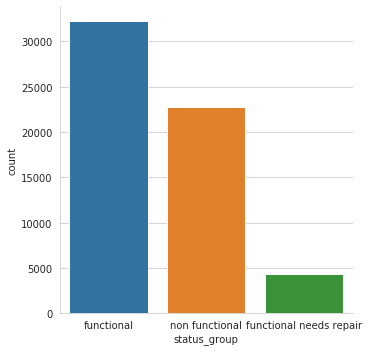

In [927]:
sns.catplot(x = 'status_group', kind = "count", data = y_train)

## Processing Data for Modeling
In order to process the data for modeling, I want to follow the following steps.
1. Use scikit-learn's `StandardScaler` to scale my numeric feature values.
2. Use scikit-learn's `LabelEncoder` to encode my categorical features.
3. Convert 'region_code' and 'district_code' to categorical

### Importing Modeling

In [928]:
# %load Modeling.py

#~~~~~~~~~~~~~~#
#Data Manipulation

#Getting Numerical Vars
def get_nums(data):
    #List of Numerical Features

    num_feats = []
    for feat in data.dtypes.index:
        if data[feat].dtype == "float64":
            num_feats.append(feat)
    return(num_feats)

#Encoding Numerical Vars
def scaling_nums(data, to_scale, train = True, train_data = None):
    std_scal = StandardScaler()
    #Label encoding when working with training data
    #When train = True, no need for train_data
    if train:
        data[to_scale] = std_scal.fit_transform(data[to_scale])
    #Since I want to fit the testing data based on the training data fit
    #Now need the train_data param
    else:
        std_scal.fit(train_data[to_scale])
        data[to_scale] = std_scal.transform(data[to_scale])
    return(data)

#Getting Categorical Vars
def get_cats(data):
    #List of Categorical Features

    cat_feats = []
    for feat in data.dtypes.index:
        if data[feat].dtype == "object":
            cat_feats.append(feat)
    return(cat_feats)

#Encoding Categorical Vars
def encoding_cats(data, train = True, train_data = None):
    #getting cat_feats
    cat_feats = get_cats(data)
    lab_encoder = LabelEncoder()
    #Label encoding when working with training data
    #When train = True, no need for train_data
    if train:
        for feat in cat_feats:
            encoded_col = "{}_encoded".format(feat)
            data[encoded_col] = lab_encoder.fit_transform(data[feat])
    #Since I want to fit the testing data based on the training data fit
    #Now need the train_data param
    else:
        for feat in cat_feats:
            encoded_col = "{}_encoded".format(feat)
            lab_encoder.fit(train_data[feat])
            data[encoded_col] = lab_encoder.transform(data[feat])
    data.drop(axis = 1, columns = cat_feats, inplace = True)
    return(data)

#Convert Region_code and District_code to Categorical
def to_category(data, to_cater):
    add_to_cater = get_cats(data)
    to_cater = to_cater.append(add_to_cater)
    for feat in to_cater:
        data[feat] = data[feat].astype('category')
    return(data)

#Dates

def as_dates(data):
    data.date_recorded = pd.to_datetime(data.date_recorded)
    return(data)

#~~~~~~~~~~~~~~#
#Modeling

#Validation Function:
#Adding random shuffle to cross validation folds

def rand_shuf_cv(train_data, target_data, model, n_folds):
    train_values = train_data.values
    y_train_values = target_data.values
    kfolds = KFold(n_folds, shuffle=True, random_state = 84)
    acc = np.sqrt(-cross_val_score(model, train_values, y_train_values, scoring = "accuracy", cv = kfolds))
    return(acc)

def modelfit(alg, dtrain, predictors, target, preformCV = True, cv_folds = 5, objective = "reg", print_feat_imp = False):

    """
    A Model fitting algorithm for sklearn models. The default setup is for regression tasks, but it also supportes
    functionality for classification as well. The objective is set to "reg" for the default regression, if you need
    classification, use objective = "class".
    Print_feat_imp is set to false by default, as it should only be run if the model has module .feature_importances.
    """

    #Fitting the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])

    #Predicting Training Set
    dtrain_predictions = alg.predict(dtrain[predictors])
    if objective == "class":
        dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]

    #Preforming Cross Validation
    if preformCV:
        from sklearn.model_selection import cross_val_score
        if objective == "reg":
            cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target],
                                      cv = cv_folds, scoring="neg_mean_squared_error")
        elif objective == "class":
            cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target],
                                      cv = cv_folds, scoring="accuracy")
        else:
            print("Invalid Objective")

    #Print Model Report:
    if objective == "reg":
        print("\nModel Report")
        print("Accuracy : {:4g}".format(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
        print("R^2 Score (Train): {}".format(metrics.r2_score(dtrain[target], dtrain_predictions)))
    elif objective == "class":
        print("\nModel Report")
        print("\tAccuracy : {:4g}".format(metrics.accuracy_score(dtrain[target].values, dtrain_predictions)))
        print("\tConfusion Matrix : \n{}".format(metrics.confusion_matrix(dtrain[target], dtrain_predictions)))

    if preformCV:
        print("\tCV Score: Mean = %.4g | Std = %.4g |\n \t\t Min = %.4g | Max = %.4g" % (np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score)))

    #Plotting Feature Importances
    if print_feat_imp:
        fig = plt.figure(figsize = (15,10))
        feat_imp = pd.Series(alg.feature_importances_).sort_values(ascending = False)
        ax = feat_imp.plot(kind = "bar", title = "Feature Importances")
        plt.ylabel("Feature Importance Score")
        plt.xticks(rotation = "vertical")
        #The x ticks are shown as the col number by default
        #Here I revise this so they are listed by the feature name
        preds_dict = dict(zip(range(len(predictors)), predictors))
        x_labels = []
        for el in list(feat_imp.index):
            x_labels.append(preds_dict[el])
        plt.xticks(ticks = np.array(range(len(predictors))),
                  labels = x_labels)


def modelfit_xgb(alg, dtrain, predictors, target, useTrainCV = True, cv_folds = 5, early_stopping_rounds = 50, objective = 'reg', eval_metric = 'rmse'):

    """
    A Model fitting algorithm for the XGBoost algorithm, using the SKlearn wrapper. The default setup is for regression tasks, but it also supportes
    functionality for classification as well. The objective is set to "reg" for the default regression, if you need
    classification, use objective = "class".
    """

    if objective == 'class':
        le = LabelEncoder()
        dtrain[target] = le.fit_transform(dtrain[target])

    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        #DMatrix is a data matrix used specifically for XGBoost
        #Optimized for both memory effiecncy and training speed
        xgtrain = xgb.DMatrix(dtrain[predictors].values,
                              label = dtrain[target].values)
        if objective == 'reg':
            cvresult = xgb.cv(xgb_param, xgtrain,
                               num_boost_round=alg.get_params()['n_estimators'],
                               nfold = cv_folds, metrics = "rmse",
                               early_stopping_rounds=early_stopping_rounds)
        if objective == 'class':
            cvresult = xgb.cv(xgb_param, xgtrain,
                               num_boost_round=alg.get_params()['n_estimators'],
                               nfold = cv_folds, metrics = "merror",
                               early_stopping_rounds=early_stopping_rounds)

        alg.set_params(n_estimators = cvresult.shape[0])

    #Fitting the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target], eval_metric = eval_metric)

    #Predicting Training Set
    dtrain_predictions = alg.predict(dtrain[predictors])
    #dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]

    #Print Model Report:
    if objective == 'reg':
        print("\nModel Report")
        print("Accuracy : {:4g}".format(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
        print("R^2 Score (Train): {}".format(metrics.r2_score(dtrain[target], dtrain_predictions)))

    elif objective == "class":
        print("\nModel Report")
        print("\tAccuracy : {:4g}".format(metrics.accuracy_score(dtrain[target].values, dtrain_predictions)))
        print("\tConfusion Matrix : \n{}".format(metrics.confusion_matrix(dtrain[target], dtrain_predictions)))

        print("\tCV Merror rate Training: Mean = %.4g | Std = %.4g \n \t\t Min = %.4g" % (np.mean(cvresult['train-merror-mean']), np.mean(cvresult['train-merror-std']), np.min(cvresult['train-merror-mean'])))
        print("\tCV Merror rate Testing: Mean = %.4g | Std = %.4g \n \t\t Min = %.4g" % (np.mean(cvresult['test-merror-mean']), np.mean(cvresult['test-merror-std']), np.min(cvresult['test-merror-mean'])))


    #Plotting Feature Importances
    fig = plt.figure(figsize = (15,10))
    feat_imp = pd.Series(alg.feature_importances_).sort_values(ascending = False)
    ax = feat_imp.plot(kind = "bar", title = "Feature Importances")
    plt.ylabel("Feature Importance Score")
    plt.xticks(rotation = "vertical")
    #The x ticks are shown as the col number by default
    #Here I revise this so they are listed by the feature name
    preds_dict = dict(zip(range(len(predictors)), predictors))
    x_labels = []
    for el in list(feat_imp.index):
        x_labels.append(preds_dict[el])
    plt.xticks(ticks = np.array(range(25)),
              labels = x_labels)

### Testing Data

In [929]:
Final_test = encoding_cats(Final_test, train = False, train_data = X_train)

In [930]:
Final_test.head()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,Interped_pop,basin_encoded,region_encoded,lga_encoded,public_meeting_encoded,scheme_management_encoded,permit_encoded,extraction_type_encoded,extraction_type_group_encoded,extraction_type_class_encoded,management_encoded,management_group_encoded,payment_encoded,payment_type_encoded,water_quality_encoded,quality_group_encoded,quantity_encoded,quantity_group_encoded,source_encoded,source_type_encoded,source_class_encoded,waterpoint_type_encoded,waterpoint_type_group_encoded
0,50785.0,4687.500000,1996.0,35.290799,-4.059696,21.0,3.0,321.0,2012.0,0.0,0,10,78,1,3,1,9,6,3,3,2,0,2,6,2,3,3,5,3,1,6,5
1,51630.0,1970.352941,1569.0,36.656709,-3.309214,2.0,2.0,300.0,2000.0,0.0,5,0,0,1,8,1,3,1,0,7,4,0,2,6,2,2,2,8,6,0,1,1
2,17168.0,200.000000,1567.0,34.767863,-5.004344,13.0,2.0,500.0,2010.0,0.0,0,22,25,1,8,2,9,6,3,7,4,0,2,6,2,2,2,5,3,1,6,5
3,45559.0,225.142857,267.0,38.058046,-9.418672,80.0,43.0,250.0,1987.0,0.0,7,9,62,2,8,1,9,6,3,7,4,6,6,6,2,0,0,7,5,0,6,5
4,49871.0,500.000000,1260.0,35.006123,-10.950412,10.0,3.0,60.0,2000.0,0.0,7,19,75,2,11,1,3,1,0,9,4,3,1,6,2,1,1,8,6,0,1,1


### Training Data

In [931]:
#to_scale= ['amount_tsh', 'population']

In [932]:
#X_train = scaling_nums(X_train, to_scale)

In [933]:
X_train = encoding_cats(X_train)

In [934]:
X_train.head()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,Interped_pop,basin_encoded,region_encoded,lga_encoded,public_meeting_encoded,scheme_management_encoded,permit_encoded,extraction_type_encoded,extraction_type_group_encoded,extraction_type_class_encoded,management_encoded,management_group_encoded,payment_encoded,payment_type_encoded,water_quality_encoded,quality_group_encoded,quantity_encoded,quantity_group_encoded,source_encoded,source_type_encoded,source_class_encoded,waterpoint_type_encoded,waterpoint_type_group_encoded
0,69572.0,6000.000000,1390.0,34.938093,-9.856322,11.0,5.0,109.000000,1999.0,0.0,1,16,64,1,8,0,3,1,0,7,4,2,0,6,2,1,1,8,6,0,1,1
1,8776.0,542.857143,1399.0,34.698766,-2.147466,20.0,2.0,280.000000,2010.0,0.0,4,11,124,2,2,1,3,1,0,11,4,0,2,6,2,2,2,5,3,1,1,1
2,34310.0,25.000000,686.0,37.460664,-3.821329,21.0,4.0,250.000000,2009.0,0.0,5,10,129,1,8,1,3,1,0,7,4,4,5,6,2,1,1,0,1,1,2,1
3,67743.0,525.000000,263.0,38.486161,-11.155298,90.0,63.0,58.000000,1986.0,0.0,7,14,105,1,8,1,14,10,5,7,4,0,2,6,2,0,0,3,0,0,2,1
4,19728.0,0.000000,0.0,31.130847,-1.825359,18.0,1.0,984.846154,1960.0,1.0,4,5,37,1,7,1,3,1,0,1,1,0,2,6,2,3,3,5,3,1,1,1


In [935]:
X_train.describe()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,Interped_pop,basin_encoded,region_encoded,lga_encoded,public_meeting_encoded,scheme_management_encoded,permit_encoded,extraction_type_encoded,extraction_type_group_encoded,extraction_type_class_encoded,management_encoded,management_group_encoded,payment_encoded,payment_type_encoded,water_quality_encoded,quality_group_encoded,quantity_encoded,quantity_group_encoded,source_encoded,source_type_encoded,source_class_encoded,waterpoint_type_encoded,waterpoint_type_group_encoded
count,59388.000000,59388.000000,59388.000000,59388.000000,59388.000000,59388.000000,59388.000000,59388.000000,59388.000000,59388.000000,59388.000000,59388.000000,59388.000000,59388.000000,59388.000000,59388.000000,59388.000000,59388.000000,59388.000000,59388.000000,59388.000000,59388.000000,59388.000000,59388.000000,59388.000000,59388.000000,59388.000000,59388.000000,59388.000000,59388.000000,59388.000000,59388.000000
mean,37114.588520,809.842735,668.363946,35.096784,-5.802994,15.296996,5.629925,389.425834,1987.631912,0.359854,4.077474,12.325908,73.361117,0.971072,8.069273,0.757005,6.330976,3.936334,1.264498,7.276150,3.638563,2.318078,2.842089,5.754260,2.263016,1.325840,1.325840,6.063363,3.970600,0.224709,2.573988,2.056122
std,21453.351683,4217.427124,693.119574,2.589706,2.805828,17.589068,9.634593,620.713513,19.860096,0.479961,2.473129,6.894233,42.449738,0.374663,2.084468,0.535602,4.214124,3.527244,1.626680,2.045046,1.058407,2.271284,1.836136,0.900862,0.784227,0.803717,0.803717,2.034105,2.191893,0.417394,1.781400,1.378910
min,0.000000,0.000000,-90.000000,29.607122,-11.649440,1.000000,0.000000,1.000000,1960.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.272903,-8.541109,5.000000,2.000000,89.000000,1960.000000,0.000000,2.000000,7.000000,38.000000,1.000000,8.000000,0.000000,3.000000,1.000000,0.000000,7.000000,4.000000,0.000000,2.000000,6.000000,2.000000,1.000000,1.000000,5.000000,3.000000,0.000000,1.000000,1.000000
50%,37060.500000,50.000000,369.000000,34.909048,-5.021786,12.000000,3.000000,242.739726,1994.000000,0.000000,4.000000,12.000000,73.000000,1.000000,8.000000,1.000000,4.000000,2.000000,1.000000,7.000000,4.000000,2.000000,2.000000,6.000000,2.000000,1.000000,1.000000,7.000000,5.000000,0.000000,2.000000,1.000000
75%,55656.500000,535.294118,1320.000000,37.178558,-3.326175,17.000000,5.000000,461.500000,2006.000000,1.000000,6.000000,18.000000,110.000000,1.000000,8.000000,1.000000,9.000000,6.000000,2.000000,7.000000,4.000000,4.000000,5.000000,6.000000,2.000000,2.000000,2.000000,8.000000,6.000000,0.000000,4.000000,3.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-0.998464,99.000000,80.000000,13354.000000,2013.000000,1.000000,8.000000,24.000000,147.000000,2.000000,12.000000,2.000000,17.000000,12.000000,6.000000,11.000000,4.000000,6.000000,6.000000,7.000000,5.000000,4.000000,4.000000,9.000000,6.000000,1.000000,6.000000,5.000000


In [936]:
X_train['quantity_encoded'].equals(X_train['quantity_group_encoded'])

True

In [937]:
X_train['payment_encoded'].equals(X_train['payment_type_encoded'])

False

The two quantity features, `quantity_encoded` and `quantity_group_encoded` are perfectly equal. I'll drop the later, since it doesn't add any additional information to the estimates.

In [938]:
X_train.drop(axis = 1, columns = 'quantity_group_encoded', inplace = True)
Final_test.drop(axis = 1, columns = 'quantity_group_encoded', inplace = True)

Finally, I am gong to drop the matching outlier values in the y_train set, to match its length to the training set.

In [939]:
y_train = y_train[~y_train['id'].isin(drop_ids)]
y_train.reset_index(inplace = True, drop = True)

### Data Manipulation

#### PCA

In [940]:
scaled_df = pd.read_csv("Data/Final/Train1.csv")
scaled_df = scaled_df[scaled_df['population'] < 15000]
scaled_df.reset_index(inplace = True, drop = True)

In [941]:
columns = [x for x in scaled_df.columns if x not in predictors_limit]
columns.append("region_code")
columns.append("district_code")
columns

['id',
 'amount_tsh',
 'date_recorded',
 'wpt_name',
 'subvillage',
 'ward',
 'scheme_name',
 'extraction_type',
 'extraction_type_group',
 'payment_type',
 'water_quality',
 'quantity_group',
 'source_type',
 'waterpoint_type_group',
 'Interped_pop',
 'region_code',
 'district_code']

In [942]:
scaled_df.drop(axis = 1, columns = columns, inplace = True)

In [943]:
SE = StandardScaler()

In [945]:
scaled_df.iloc[:, [0, 1, 2, 6, 10]] = SE.fit_transform(scaled_df.iloc[:, [0, 1, 2, 6, 10]])

In [946]:
scaled_df = pd.get_dummies(scaled_df, drop_first=True)

In [947]:
scaled_df.head()

,gps_height,longitude,latitude,population,construction_year,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Dar es Salaam,region_Dodoma,region_Geita,region_Iringa,region_Kagera,region_Katavi,region_Kigoma,...,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,source_class_surface,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,1.041151,-0.061278,-1.444622,-0.451784,0.572413,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,1.054136,-0.153694,1.302845,-0.176292,1.126292,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
2,0.025445,0.912807,0.706273,-0.224624,1.075940,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,-0.584845,1.308799,-1.907583,-0.533948,-0.082171,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,-0.964292,-1.531437,1.417645,0.959259,-1.391340,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0


In [969]:
pca = PCA(n_components = .8)

In [970]:
components = pca.fit_transform(scaled_df)

In [971]:
ex_var = round(pca.explained_variance_ratio_.sum(), 4)*100
print("{}% of the variance is explained by the first three partial components".format(ex_var))

80.02% of the variance is explained by the first three partial components


In [972]:
components.shape

(59388, 24)

In [977]:
components_df = pd.DataFrame(data = components, columns = ["PCA " + str(i+1) for i in range(components.shape[1])])

In [978]:
components_df.head()

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8,PCA 9,PCA 10,PCA 11,PCA 12,PCA 13,PCA 14,PCA 15,PCA 16,PCA 17,PCA 18,PCA 19,PCA 20,PCA 21,PCA 22,PCA 23,PCA 24
0,-1.670506,-0.056868,-1.536884,0.663418,-0.241477,-0.359162,0.036061,-0.583715,0.511299,0.742212,-0.165368,-0.412063,0.002299,-0.270782,-0.178599,-0.158548,0.038647,-0.080979,0.033294,-0.306514,-0.249102,0.262596,-0.141216,-0.211119
1,-0.442978,-2.045262,0.936876,-0.264370,0.115438,0.881925,0.071108,1.040606,0.148846,0.095244,-0.324843,-0.609376,0.997726,-0.433025,0.643829,0.575178,0.160217,-0.438837,0.282706,0.189314,0.415247,-0.344126,-0.033456,-0.166281
2,-0.977410,-0.341496,1.104242,-0.220997,0.509737,-0.216227,-0.960109,-0.400356,-0.335327,-0.629118,0.156646,-0.143292,-0.496520,0.211527,0.697617,-0.023765,-0.186012,-0.106207,0.040943,-0.040140,-0.718237,-0.168806,0.460580,-0.003737
3,-1.255639,2.269616,-0.246650,0.039855,0.028835,-0.334855,-0.283284,0.137717,0.540618,-0.660096,0.246592,0.844646,0.022873,-0.296732,1.190415,0.022185,-0.345786,0.099256,-0.069306,-0.335191,0.147164,0.038981,-0.124474,0.205540
4,2.673614,-0.787555,-0.092687,-0.380513,1.237549,1.391627,0.068670,0.456518,-0.172620,0.129016,0.034435,-0.147883,1.135201,-0.027363,0.056436,-0.600728,-0.620933,0.094518,-0.685328,-0.322132,-0.014991,0.263309,-0.419802,0.025579


In [979]:
components_df = pd.concat([components_df, y_train['status_group']], axis = 1)

In [980]:
components_df.head()

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8,PCA 9,PCA 10,PCA 11,PCA 12,PCA 13,PCA 14,PCA 15,PCA 16,PCA 17,PCA 18,PCA 19,PCA 20,PCA 21,PCA 22,PCA 23,PCA 24,status_group
0,-1.670506,-0.056868,-1.536884,0.663418,-0.241477,-0.359162,0.036061,-0.583715,0.511299,0.742212,-0.165368,-0.412063,0.002299,-0.270782,-0.178599,-0.158548,0.038647,-0.080979,0.033294,-0.306514,-0.249102,0.262596,-0.141216,-0.211119,functional
1,-0.442978,-2.045262,0.936876,-0.264370,0.115438,0.881925,0.071108,1.040606,0.148846,0.095244,-0.324843,-0.609376,0.997726,-0.433025,0.643829,0.575178,0.160217,-0.438837,0.282706,0.189314,0.415247,-0.344126,-0.033456,-0.166281,functional
2,-0.977410,-0.341496,1.104242,-0.220997,0.509737,-0.216227,-0.960109,-0.400356,-0.335327,-0.629118,0.156646,-0.143292,-0.496520,0.211527,0.697617,-0.023765,-0.186012,-0.106207,0.040943,-0.040140,-0.718237,-0.168806,0.460580,-0.003737,functional
3,-1.255639,2.269616,-0.246650,0.039855,0.028835,-0.334855,-0.283284,0.137717,0.540618,-0.660096,0.246592,0.844646,0.022873,-0.296732,1.190415,0.022185,-0.345786,0.099256,-0.069306,-0.335191,0.147164,0.038981,-0.124474,0.205540,non functional
4,2.673614,-0.787555,-0.092687,-0.380513,1.237549,1.391627,0.068670,0.456518,-0.172620,0.129016,0.034435,-0.147883,1.135201,-0.027363,0.056436,-0.600728,-0.620933,0.094518,-0.685328,-0.322132,-0.014991,0.263309,-0.419802,0.025579,functional


In [753]:
scaled_df = pd.concat([scaled_df, y_train['status_group']], axis = 1)

In [981]:
predictors_pca = [x for x in components_df.columns if x not in ['status_group']]
predictors_pca

['PCA 1',
 'PCA 2',
 'PCA 3',
 'PCA 4',
 'PCA 5',
 'PCA 6',
 'PCA 7',
 'PCA 8',
 'PCA 9',
 'PCA 10',
 'PCA 11',
 'PCA 12',
 'PCA 13',
 'PCA 14',
 'PCA 15',
 'PCA 16',
 'PCA 17',
 'PCA 18',
 'PCA 19',
 'PCA 20',
 'PCA 21',
 'PCA 22',
 'PCA 23',
 'PCA 24']

## Modeling

In [755]:
#Splitting the training and testing data
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train.iloc[:, 1:], y_train.iloc[:, 1:], test_size = 0.2, random_state = 84)

In [992]:
#Full training data set
dtrain = X_train.iloc[:, 1:].copy()
dtrain['status_group'] = y_train['status_group'].copy()
predictors = [x for x in dtrain.columns if x not in ['status_group']]
#Updating the limited predictiors to their encoded forms
predictors_limit = [x + "_encoded" if x not in ["gps_height", "population", "latitude", "longitude", "region_code", "district_code", "construction_year", "Interped_pop"] else x for x in predictors_limit]

### K Neighbors

In [1012]:
KNN = KNeighborsClassifier()
KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [1013]:
modelfit(KNN, components_df, predictors_pca, 'status_group', objective = 'class')


Model Report
	Accuracy : 0.833131
	Confusion Matrix : 
[[29429   522  2303]
 [ 2020  1844   452]
 [ 4232   381 18205]]
	CV Score: Mean = 0.7666 | Std = 0.004206 |
 		 Min = 0.7604 | Max = 0.7723


In [1014]:
param_grid = [{
    'leaf_size' : range(20, 71, 10),
    'n_neighbors' : [3,5,8,10,15],
}]

clf = GridSearchCV(KNN, param_grid=param_grid,
                  cv = 5, scoring="accuracy")
clf.fit(components_df[predictors_pca], components_df['status_group'])
clf.best_params_

{'leaf_size': 20, 'n_neighbors': 3}

In [1015]:
param_grid = [{
    'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
    'metric' : ['manhattan', 'chebyshev', 'euclidean', 'minkowski']
}]

KNN = KNeighborsClassifier(leaf_size = 20, 
                          n_neighbors = 3)

clf = GridSearchCV(KNN, param_grid=param_grid,
                  cv = 5, scoring="accuracy")
clf.fit(components_df[predictors_pca], components_df['status_group'])
clf.best_params_

{'algorithm': 'brute', 'metric': 'manhattan'}

In [1004]:
KNN = KNeighborsClassifier(algorithm = 'ball_tree',
                           leaf_size = 20,
                           metric = 'euclidean',
                           n_neighbors = 3)

In [1005]:
modelfit(KNN, dtrain, predictors, 'status_group', objective = 'class')


Model Report
	Accuracy : 0.830757
	Confusion Matrix : 
[[29133   455  2666]
 [ 1887  2017   412]
 [ 4408   223 18187]]
	CV Score: Mean = 0.6951 | Std = 0.001799 |
 		 Min = 0.6927 | Max = 0.6975


### Random Forest Classification

#### Modeling with RF

##### Using Full Feature Set

In [573]:
RF = RandomForestClassifier()
RF.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**Naive Model**

/home/anna/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Model Report
	Accuracy : 0.980973
	Confusion Matrix : 
[[32089    76    89]
 [  332  3945    39]
 [  555    39 22224]]
	CV Score: Mean = 0.795 | Std = 0.002693 |
 		 Min = 0.7908 | Max = 0.7991


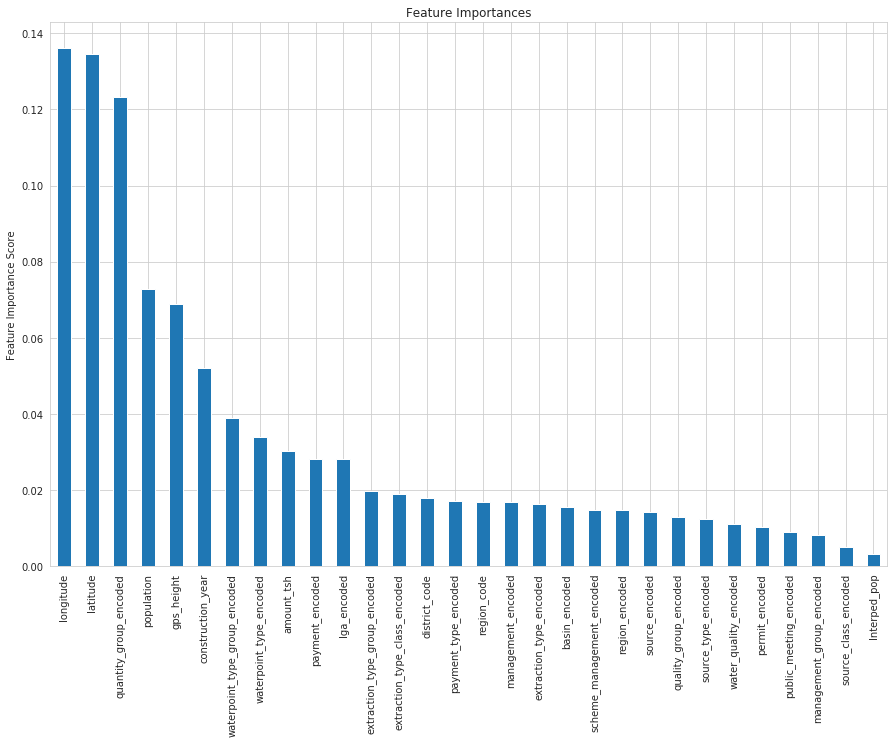

In [574]:
#Fitting model with default parameters
modelfit(RF, dtrain, predictors, 'status_group', objective = 'class', print_feat_imp= True)

**Tuning Step 1**

In [25]:
param_grid = [{
    "max_depth" : [20, 30, 40],
    "min_samples_leaf" : [2,4,8],
    "min_samples_split" : [2, 5, 10],
    "n_estimators" : [125, 150, 175]
}]

clf = GridSearchCV(RF, param_grid=param_grid, cv = 5,
                  scoring = "accuracy")
clf.fit(dtrain[predictors], dtrain['status_group'])
clf.best_params_

{'max_depth': 30,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 175}

**Tuning Step 2**  
*Fine-tuning Step 1*

In [26]:
param_grid = [{
    "max_depth" : [40, 45],
    "min_samples_leaf" : [1,2,3],
    "min_samples_split" : [2],
    "n_estimators" : [175, 180, 185]
}]

clf = GridSearchCV(RF, param_grid=param_grid, cv = 5,
                  scoring = "accuracy")
clf.fit(dtrain[predictors], dtrain['status_group'])

{'max_depth': 40,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 185}

**Tuned Model**

In [778]:
#Reestablishing RF model with tuned parameters
RF = RandomForestClassifier(max_depth= 40,
                           min_samples_leaf = 2,
                           min_samples_split = 2,
                           n_estimators = 180)


Model Report
	Accuracy : 0.923554
	Confusion Matrix : 
[[31512   132   610]
 [ 1436  2509   371]
 [ 1881   110 20827]]
	CV Score: Mean = 0.8117 | Std = 0.002492 |
 		 Min = 0.8083 | Max = 0.8149


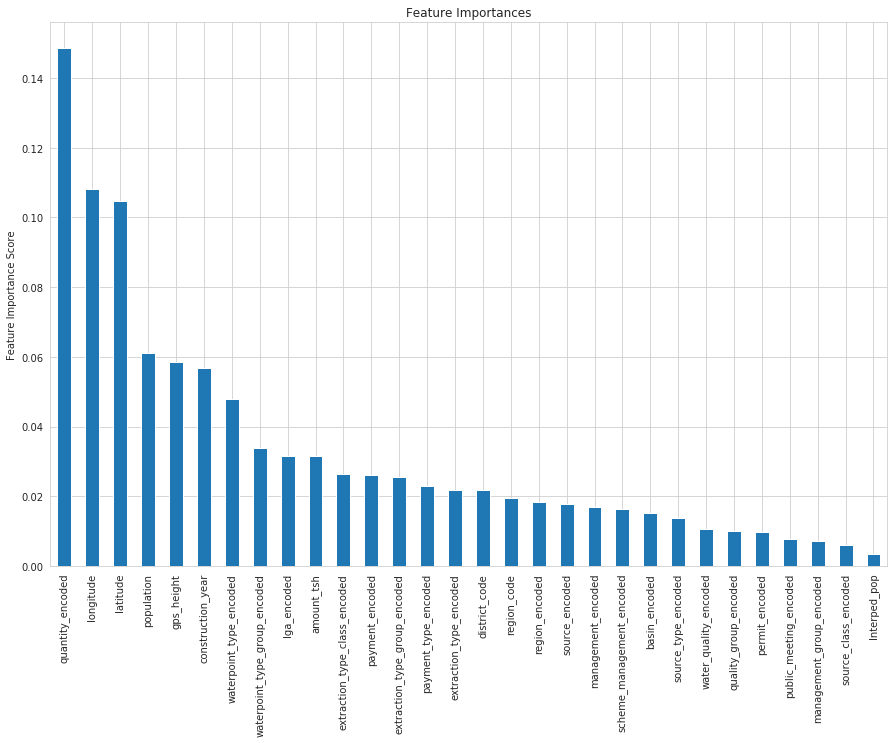

In [779]:
modelfit(RF, dtrain, predictors, 'status_group', objective = 'class', print_feat_imp=True)
plt.savefig("Images/RF_Full_VarImp.png")

##### Using Limited Feature set

In [757]:
RF_lf = RandomForestClassifier()
RF_lf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**Naive Model**

/home/anna/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Model Report
	Accuracy : 0.980568
	Confusion Matrix : 
[[32091    63   100]
 [  351  3930    35]
 [  558    47 22213]]
	CV Score: Mean = 0.7917 | Std = 0.003912 |
 		 Min = 0.7872 | Max = 0.7975


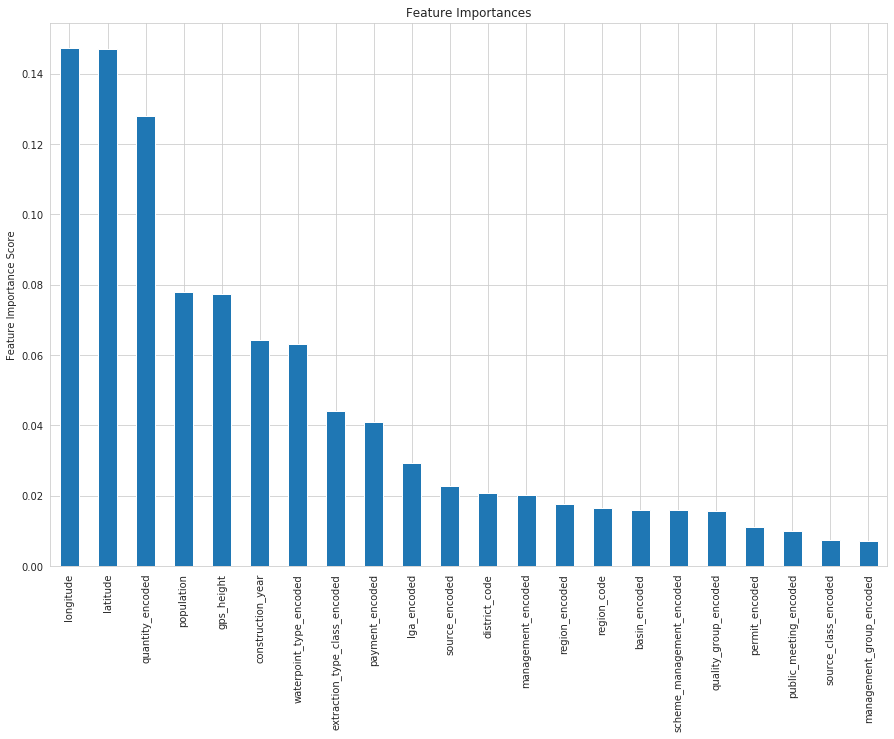

In [759]:
#Fitting Model with default RF parameters
modelfit(RF_lf, dtrain, predictors_limit, 'status_group', objective = 'class', print_feat_imp= True)

**Tuneing Step 1**

In [763]:
param_grid = [{
    "max_depth" : [20, 30, 40],
    "min_samples_leaf" : [2,4,8],
    "min_samples_split" : [2, 5, 10],
    "n_estimators" : [125, 150, 175]
}]

clf = GridSearchCV(RF_lf, param_grid=param_grid, cv = 5,
                  scoring = "accuracy")
clf.fit(dtrain[predictors_limit], dtrain['status_group'])
clf.best_params_

{'max_depth': 40,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 150}

**Tuning Step 2**  
*Fine-tuning max_depth and n_estimators*

In [769]:
param_grid = [{
    "max_depth" : [40, 45, 50],
    "min_samples_split" : [4,5,6]
}]

RF_lf = RandomForestClassifier(min_samples_leaf=2,
                               n_estimators = 150, 
                               min_samples_split = 5)


clf = GridSearchCV(RF_lf, param_grid=param_grid, cv = 5,
                  scoring = "accuracy")
clf.fit(dtrain[predictors_limit], dtrain['status_group'])
clf.best_params_

{'max_depth': 40}

**Tuned Model**

In [770]:
#Reestablish RF_lf with tuned parameters
RF_lf = RandomForestClassifier(min_samples_leaf=2,
                               n_estimators = 150,
                               min_samples_split = 5,
                               max_depth = 40)


Model Report
	Accuracy : 0.916818
	Confusion Matrix : 
[[31449   146   659]
 [ 1553  2364   399]
 [ 2055   128 20635]]
	CV Score: Mean = 0.8114 | Std = 0.00235 |
 		 Min = 0.809 | Max = 0.8144


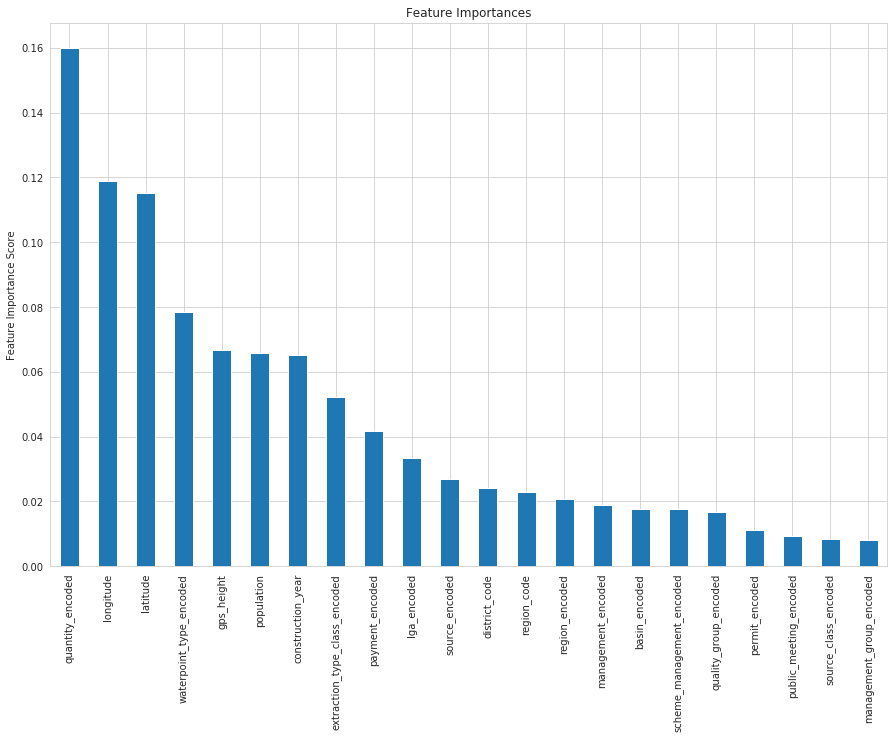

In [777]:
modelfit(RF_lf, dtrain, predictors_limit, 'status_group', objective = 'class', print_feat_imp= True)
plt.savefig("Images/RF_Pars_VarImp.png")

#### Predictions

**Preds 1**

The first predictions created for submisson based on the Random Forest model used the following parameters in the model:
+ 'bootstrap': True,
+ 'class_weight': None,
+ 'criterion': 'gini',
+ 'max_depth': 40,
+ 'max_features': 'auto',
+ 'max_leaf_nodes': None,
+ 'min_impurity_decrease': 0.0,
+ 'min_impurity_split': None,
+ 'min_samples_leaf': 2,
+ 'min_samples_split': 2,
+ 'min_weight_fraction_leaf': 0.0,
+ 'n_estimators': 180,
+ 'n_jobs': None,
+ 'oob_score': False,
+ 'random_state': None,
+ 'verbose': 0,
+ 'warm_start': False

In [ ]:
RF.fit(X_train[predictors], y_train['status_group'])

In [ ]:
preds = RF.predict(Final_test.iloc[:, 1:])
preds_df = pd.concat([Final_test['id'], pd.Series(preds, name = 'status_group')], axis = 1)
preds_df.to_csv("Data/Preds/Pred_RF_1.csv", index = False)

**Preds 2**  
The second predictions generated from a random forest model were generated using the parsimonius model, with the following parameters:
+ min_samples_leaf=2
+ n_estimators = 150
+ min_samples_split = 5
+ max_depth = 40

In [786]:
RF_lf.fit(X_train[predictors_limit], y_train['status_group'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=40, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [787]:
preds = RF_lf.predict(Final_test[predictors_limit])
preds_df = pd.concat([Final_test['id'], pd.Series(preds, name = 'status_group')], axis = 1)
preds_df.to_csv("Data/Preds/Pred_RF_Pars_1.csv", index = False)

### Gradient Boosting

#### Modeling with GB

##### Using Full Feature Set

In [35]:
GBM = GradientBoostingClassifier()
GBM.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


Model Report
	Accuracy : 0.755606
	Confusion Matrix : 
[[29916   126  2217]
 [ 3223   520   574]
 [ 8230   147 14447]]
	CV Score: Mean = 0.7526 | Std = 0.003326 |
 		 Min = 0.7495 | Max = 0.7591


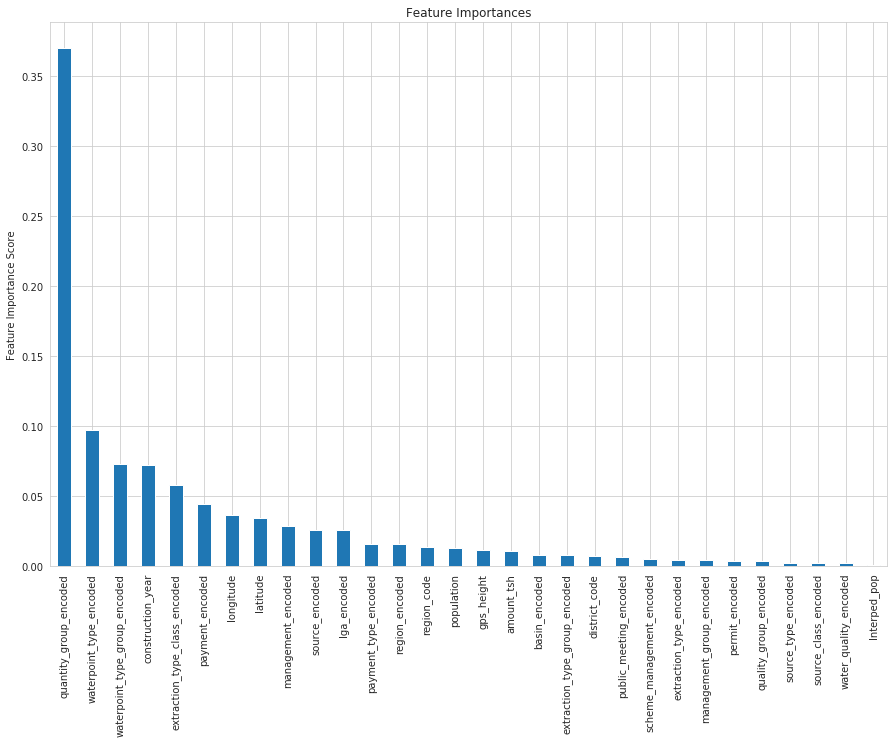

In [36]:
modelfit(GBM, dtrain, predictors, 'status_group', objective = 'class', print_feat_imp=True)

**Tuning Step 1**

In [40]:
#Tuneing Estimators
param_grid = [{
    "n_estimators" : [250, 500, 750, 1000]
}]


GBM = GradientBoostingClassifier(min_samples_split=3,
                                max_depth=5,
                                max_features="sqrt",
                                subsample=0.8, 
                                min_samples_leaf=3, 
                                random_state = 40)
clf = GridSearchCV(GBM, param_grid=param_grid,
                  cv = 5, scoring="accuracy")
clf.fit(dtrain[predictors], dtrain['status_group'])
clf.best_params_

KeyboardInterrupt: 

**Tuning Step 2**

In [39]:
param_grid = [{
    "max_depth" : range(3, 10, 2),
    "min_samples_split" : range(50, 150, 10)
}]

GBM = GradientBoostingClassifier(n_estimators = 750,
                                max_features="sqrt",
                                subsample=0.8, 
                                min_samples_leaf=3, 
                                random_state = 40)
clf = GridSearchCV(GBM, param_grid=param_grid,
                  cv = 5, scoring="accuracy")
clf.fit(dtrain[predictors], dtrain['status_group'])
clf.best_params_

{'max_depth': 9, 'min_samples_split': 100}

**Tuning Step 3**

In [89]:
param_grid = [{
    "min_samples_leaf" : range(0, 51, 10),
    "subsample" : [i/10. for i in range(6,11)]
}]

GBM = GradientBoostingClassifier(n_estimators = 500,
                                 max_depth=5,
                                 min_samples_split=100,
                                 max_features="sqrt",
                                 random_state = 40)

clf = GridSearchCV(GBM, param_grid=param_grid,
                  cv = 5, scoring="accuracy")
clf.fit(dtrain[predictors], dtrain['status_group'])
clf.best_params_

KeyboardInterrupt: 

**Tuning Step 4**

In [ ]:
param_grid = [{
    "learning_rate" : [.25, .2, .15, .1, .05, .005]
}]

GBM = GradientBoostingClassifier(n_estimators = 750,
                                 max_depth=5,
                                 min_samples_leaf = 40,
                                 subsample = 0.6,
                                 min_samples_split=100,
                                 max_features="sqrt",
                                 random_state = 40)

clf = GridSearchCV(GBM, param_grid=param_grid,
                  cv = 5, scoring="accuracy")
clf.fit(dtrain[predictors], dtrain['status_group'])
clf.best_params_

**Tuned Model**

In [1000]:
GBM = GradientBoostingClassifier(n_estimators = 750,
                                 max_depth=5,
                                 min_samples_leaf = 40,
                                 subsample = 0.6,
                                 min_samples_split=100,
                                 max_features="sqrt",
                                 random_state = 40,
                                 learning_rate = 0.05)


Model Report
	Accuracy : 0.815485
	Confusion Matrix : 
[[29831   298  2125]
 [ 2457  1274   585]
 [ 5334   159 17325]]
	CV Score: Mean = 0.7918 | Std = 0.002446 |
 		 Min = 0.7887 | Max = 0.7953


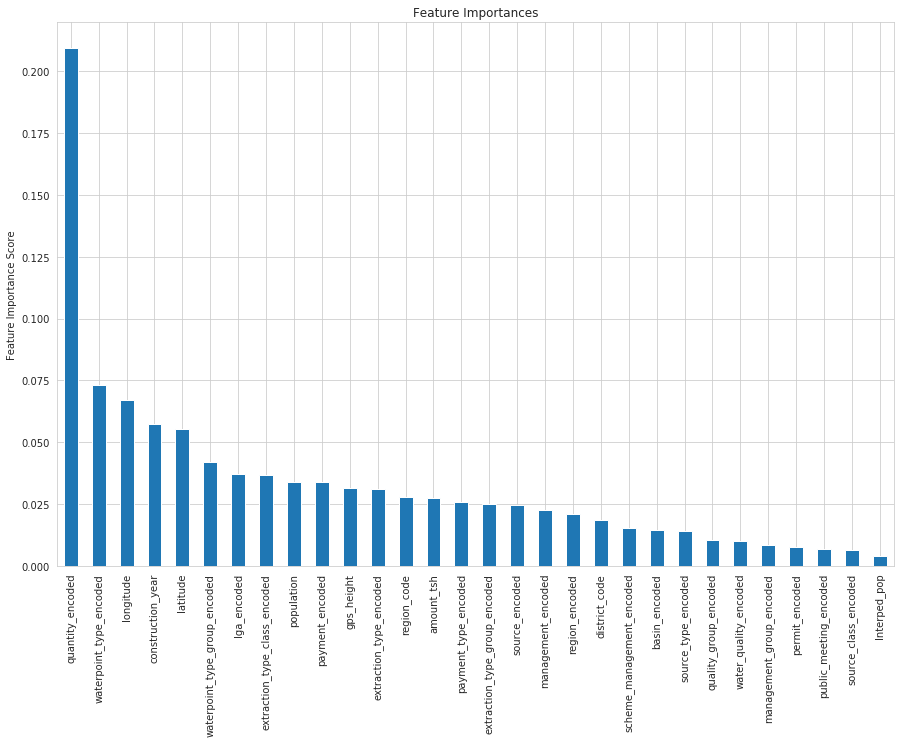

In [1001]:
#Refitting the model using the tuned parameters
modelfit(GBM, dtrain, predictors, 'status_group', objective = 'class', print_feat_imp=True)
plt.savefig("Images/GBM_Full_VarImp.png")

##### Using Limited Feature Set

In [764]:
GBM_lf = GradientBoostingClassifier()

**Naive Model**


Model Report
	Accuracy : 0.757645
	Confusion Matrix : 
[[29930   149  2175]
 [ 3138   592   586]
 [ 8172   173 14473]]
	CV Score: Mean = 0.7526 | Std = 0.003288 |
 		 Min = 0.75 | Max = 0.759


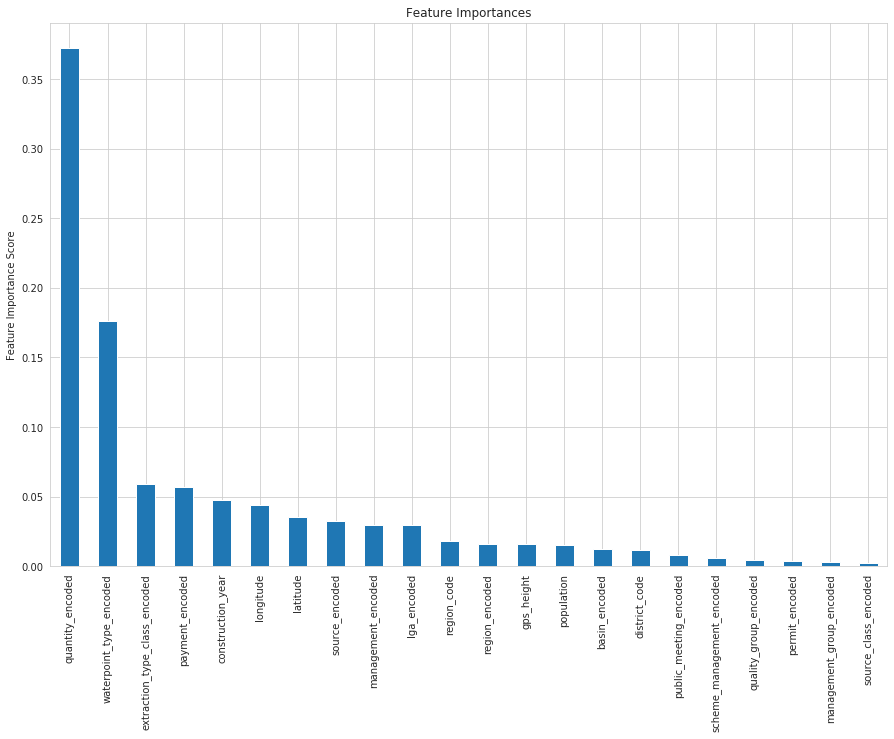

In [765]:
#Fitting the naive model using the dafault parameters
modelfit(GBM_lf, dtrain, predictors_limit, 'status_group', objective = 'class', print_feat_imp=True)

**Tuning Step 1**

In [ ]:
#Tuneing Estimators
param_grid = [{
    "n_estimators" : [250, 500, 750, 1000]
}]


GBM_lf = GradientBoostingClassifier(min_samples_split=3,
                                max_depth=5,
                                max_features="sqrt",
                                subsample=0.8, 
                                min_samples_leaf=3, 
                                random_state = 40)

clf = GridSearchCV(GBM_lf, param_grid=param_grid,
                  cv = 5, scoring="accuracy")
clf.fit(dtrain[predictors_limit], dtrain['status_group'])
clf.best_params_

**Tuning Step 2**

In [ ]:
param_grid = [{
    "max_depth" : range(3, 10, 2)
    }]

GBM_lf = GradientBoostingClassifier(n_estimators = 750,
                                max_features="sqrt",
                                subsample=0.8, 
                                min_samples_leaf=3, 
                                random_state = 40)
clf = GridSearchCV(GBM_lf, param_grid=param_grid,
                  cv = 5, scoring="accuracy")
clf.fit(dtrain[predictors_limit], dtrain['status_group'])
clf.best_params_

**Tuning Step 3**

In [ ]:
param_grid = [{
    "min_samples_split" : range(50, 151, 10)
}]

GBM_lf = GradientBoostingClassifier(n_estimators = 750,
                                max_features="sqrt",
                                 max_depth = 5,
                                subsample=0.8, 
                                min_samples_leaf=3, 
                                random_state = 40)
clf = GridSearchCV(GBM_lf, param_grid=param_grid,
                  cv = 5, scoring="accuracy")
clf.fit(dtrain[predictors_limit], dtrain['status_group'])
clf.best_params_

**Tuning Step 4**

In [ ]:
param_grid = [{
    "min_samples_leaf" : range(0, 51, 10)
}]

GBM_lf = GradientBoostingClassifier(n_estimators = 750,
                                 max_depth=5,
                                 min_samples_split=80,
                                subsample=0.8,
                                 max_features="sqrt",
                                 random_state = 40)

clf = GridSearchCV(GBM_lf, param_grid=param_grid,
                  cv = 5, scoring="accuracy")
clf.fit(dtrain[predictors_limit], dtrain['status_group'])
clf.best_params_

**Tuning Step 5**

In [ ]:
param_grid = [{
    "subsample" : [i/10. for i in range(6,11)]
}]

GBM_lf = GradientBoostingClassifier(n_estimators = 750,
                                 max_depth=5,
                                 min_samples_split=80,
                                 min_samples_leaf = 30,
                                 max_features="sqrt",
                                 random_state = 40)

clf = GridSearchCV(GBM_lf, param_grid=param_grid,
                  cv = 5, scoring="accuracy")
clf.fit(dtrain[predictors_limit], dtrain['status_group'])
clf.best_params_

**Tuning Step 6**

In [ ]:
param_grid = [{
    "learning_rate" : [.25, .2, .15, .1, .05, .005]
}]

GBM_lf = GradientBoostingClassifier(n_estimators = 750,
                                 max_depth=5,
                                 min_samples_leaf = 30,
                                 subsample = 0.6,
                                 min_samples_split=80,
                                 max_features="sqrt",
                                 random_state = 40)

clf = GridSearchCV(GBM_lf, param_grid=param_grid,
                  cv = 5, scoring="accuracy")
clf.fit(dtrain[predictors_limit], dtrain['status_group'])
clf.best_params_

**Tuned Model**

In [1002]:
GBM_lf = GradientBoostingClassifier(n_estimators = 750,
                                    max_depth=5,
                                    min_samples_leaf = 30,
                                    subsample = 0.6,
                                    learning_rate = 0.05,
                                    min_samples_split=80,
                                    max_features="sqrt",
                                    random_state = 40)


Model Report
	Accuracy : 0.815047
	Confusion Matrix : 
[[29893   296  2065]
 [ 2445  1276   595]
 [ 5412   171 17235]]
	CV Score: Mean = 0.789 | Std = 0.001836 |
 		 Min = 0.7865 | Max = 0.7917


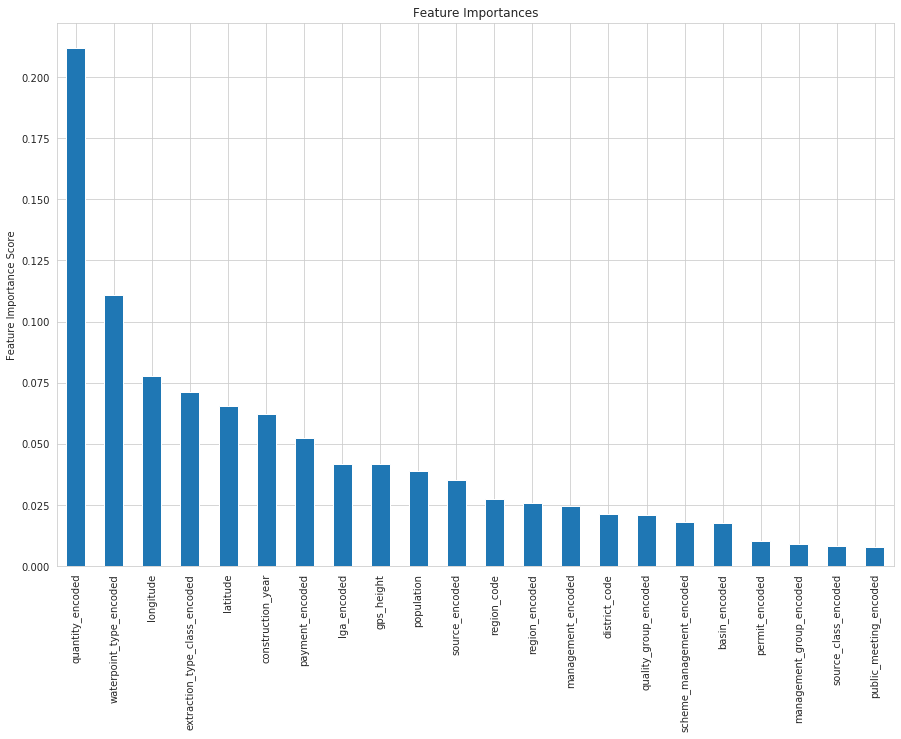

In [1003]:
#Refitting the GBM model using the optimal parameters
modelfit(GBM_lf, dtrain, predictors_limit, 'status_group', objective = 'class', print_feat_imp=True)
plt.savefig("Images/GBM_Pars_VarImp.png")

#### Predictions

**Preds 1**

In [ ]:
GBM = GradientBoostingClassifier(n_estimators = 750,
                                 max_depth=5,
                                 min_samples_leaf = 40,
                                 subsample = 0.6,
                                 min_samples_split=100,
                                 max_features="sqrt",
                                 random_state = 40,
                                 learning_rate = 0.05)

In [1008]:
GBM.fit(X_train[predictors], y_train['status_group'])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=5,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=40, min_samples_split=100,
                           min_weight_fraction_leaf=0.0, n_estimators=750,
                           n_iter_no_change=None, presort='auto',
                           random_state=40, subsample=0.6, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [1009]:
preds = GBM.predict(Final_test.iloc[:, 1:])
preds_df = pd.concat([Final_test['id'], pd.Series(preds, name = 'status_group')], axis = 1)
preds_df.to_csv("Data/Preds/Pred_GBM_Full_1.csv", index = False)

**Preds 2**

In [ ]:
GBM_lf = GradientBoostingClassifier(n_estimators = 750,
                                    max_depth=5,
                                    min_samples_leaf = 30,
                                    subsample = 0.6,
                                    learning_rate = 0.05,
                                    min_samples_split=80,
                                    max_features="sqrt",
                                    random_state = 40)

In [1010]:
GBM_lf.fit(X_train[predictors_limit], y_train['status_group'])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=5,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=30, min_samples_split=80,
                           min_weight_fraction_leaf=0.0, n_estimators=750,
                           n_iter_no_change=None, presort='auto',
                           random_state=40, subsample=0.6, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [1011]:
preds = GBM_lf.predict(Final_test[predictors_limit])
preds_df = pd.concat([Final_test['id'], pd.Series(preds, name = 'status_group')], axis = 1)
preds_df.to_csv("Data/Preds/Pred_GBM_Pars_1.csv", index = False)

### XGBoost

#### Modeling with XGB

##### Using Full Feature Set

In [59]:
XGB = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma = 0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27,
                    objective="multi:softmax",
                    num_class = 3)

In [60]:
XGB.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 1000,
 'n_jobs': 1,
 'nthread': 4,
 'objective': 'multi:softmax',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 27,
 'silent': None,
 'subsample': 0.8,
 'verbosity': 1,
 'num_class': 3}

**Naive Model**


Model Report
	Accuracy : 0.873266
	Confusion Matrix : 
[[30734   230  1295]
 [ 1762  2133   422]
 [ 3672   147 19005]]
	CV Merror rate Training: Mean = 0.1643 | Std = 0.0009073 
 		 Min = 0.1167
	CV Merror rate Testing: Mean = 0.207 | Std = 0.003762 
 		 Min = 0.1947


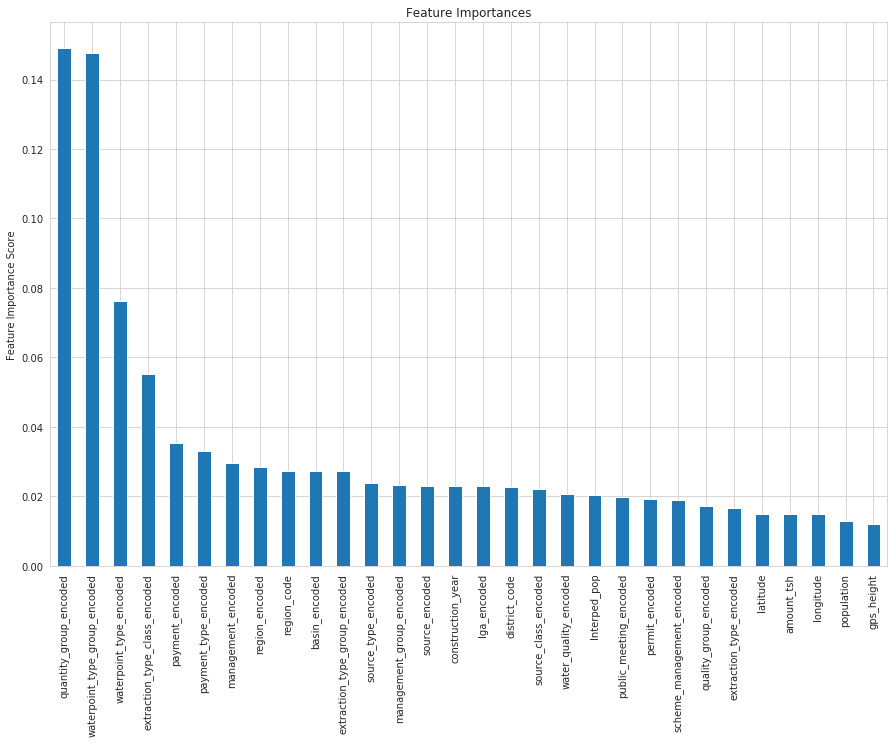

In [61]:
modelfit_xgb(XGB, dtrain, predictors_limit, 'status_group', objective = 'class', eval_metric=metrics.balanced_accuracy_score, early_stopping_rounds=None)

**Evaluating Naive Model using Evaluation Test Split**

In [62]:
eval_set = [(X_train_split, y_train_split), (X_test_split, y_test_split)]
XGB.fit(X_train_split, y_train_split.values.ravel(), eval_metric=["merror", "mlogloss"], eval_set=eval_set)

[0]	validation_0-merror:0.279377	validation_0-mlogloss:1.04116	validation_1-merror:0.28367	validation_1-mlogloss:1.04171


/home/anna/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-merror:0.277841	validation_0-mlogloss:0.996056	validation_1-merror:0.280303	validation_1-mlogloss:0.997271
[2]	validation_0-merror:0.274979	validation_0-mlogloss:0.957073	validation_1-merror:0.277189	validation_1-mlogloss:0.958852
[3]	validation_0-merror:0.273822	validation_0-mlogloss:0.926696	validation_1-merror:0.276263	validation_1-mlogloss:0.928936
[4]	validation_0-merror:0.271633	validation_0-mlogloss:0.896288	validation_1-merror:0.27399	validation_1-mlogloss:0.899065
[5]	validation_0-merror:0.270918	validation_0-mlogloss:0.866647	validation_1-merror:0.274158	validation_1-mlogloss:0.869768
[6]	validation_0-merror:0.269465	validation_0-mlogloss:0.840587	validation_1-merror:0.271465	validation_1-mlogloss:0.844127
[7]	validation_0-merror:0.26976	validation_0-mlogloss:0.819345	validation_1-merror:0.272054	validation_1-mlogloss:0.82314
[8]	validation_0-merror:0.269928	validation_0-mlogloss:0.798736	validation_1-merror:0.273232	validation_1-mlogloss:0.802952
[9]	validat

[67]	validation_0-merror:0.233123	validation_0-mlogloss:0.559382	validation_1-merror:0.24335	validation_1-mlogloss:0.578005
[68]	validation_0-merror:0.233228	validation_0-mlogloss:0.558542	validation_1-merror:0.243266	validation_1-mlogloss:0.577299
[69]	validation_0-merror:0.232513	validation_0-mlogloss:0.557132	validation_1-merror:0.242761	validation_1-mlogloss:0.576269
[70]	validation_0-merror:0.23186	validation_0-mlogloss:0.556217	validation_1-merror:0.242003	validation_1-mlogloss:0.575509
[71]	validation_0-merror:0.231923	validation_0-mlogloss:0.554969	validation_1-merror:0.241582	validation_1-mlogloss:0.574462
[72]	validation_0-merror:0.231671	validation_0-mlogloss:0.554192	validation_1-merror:0.240909	validation_1-mlogloss:0.573878
[73]	validation_0-merror:0.231292	validation_0-mlogloss:0.553207	validation_1-merror:0.241077	validation_1-mlogloss:0.572962
[74]	validation_0-merror:0.231019	validation_0-mlogloss:0.552512	validation_1-merror:0.240404	validation_1-mlogloss:0.572499
[7

[133]	validation_0-merror:0.208333	validation_0-mlogloss:0.508886	validation_1-merror:0.221128	validation_1-mlogloss:0.541251
[134]	validation_0-merror:0.208165	validation_0-mlogloss:0.508624	validation_1-merror:0.22096	validation_1-mlogloss:0.541053
[135]	validation_0-merror:0.208354	validation_0-mlogloss:0.508257	validation_1-merror:0.220875	validation_1-mlogloss:0.540822
[136]	validation_0-merror:0.208291	validation_0-mlogloss:0.507738	validation_1-merror:0.220623	validation_1-mlogloss:0.540555
[137]	validation_0-merror:0.207786	validation_0-mlogloss:0.507346	validation_1-merror:0.220707	validation_1-mlogloss:0.540336
[138]	validation_0-merror:0.207618	validation_0-mlogloss:0.506921	validation_1-merror:0.22096	validation_1-mlogloss:0.540153
[139]	validation_0-merror:0.207513	validation_0-mlogloss:0.506404	validation_1-merror:0.220202	validation_1-mlogloss:0.539742
[140]	validation_0-merror:0.207239	validation_0-mlogloss:0.50587	validation_1-merror:0.220707	validation_1-mlogloss:0.53

[199]	validation_0-merror:0.19455	validation_0-mlogloss:0.479527	validation_1-merror:0.212795	validation_1-mlogloss:0.524248
[200]	validation_0-merror:0.194234	validation_0-mlogloss:0.478967	validation_1-merror:0.212795	validation_1-mlogloss:0.523992
[201]	validation_0-merror:0.194003	validation_0-mlogloss:0.478461	validation_1-merror:0.212626	validation_1-mlogloss:0.523714
[202]	validation_0-merror:0.193729	validation_0-mlogloss:0.477889	validation_1-merror:0.212374	validation_1-mlogloss:0.523402
[203]	validation_0-merror:0.193203	validation_0-mlogloss:0.477447	validation_1-merror:0.212037	validation_1-mlogloss:0.523256
[204]	validation_0-merror:0.193308	validation_0-mlogloss:0.477083	validation_1-merror:0.211953	validation_1-mlogloss:0.523089
[205]	validation_0-merror:0.193245	validation_0-mlogloss:0.476777	validation_1-merror:0.211953	validation_1-mlogloss:0.522987
[206]	validation_0-merror:0.193098	validation_0-mlogloss:0.476295	validation_1-merror:0.211785	validation_1-mlogloss:0.

[265]	validation_0-merror:0.182933	validation_0-mlogloss:0.45528	validation_1-merror:0.208081	validation_1-mlogloss:0.512962
[266]	validation_0-merror:0.182807	validation_0-mlogloss:0.454969	validation_1-merror:0.208165	validation_1-mlogloss:0.512756
[267]	validation_0-merror:0.182849	validation_0-mlogloss:0.454767	validation_1-merror:0.207744	validation_1-mlogloss:0.512713
[268]	validation_0-merror:0.182744	validation_0-mlogloss:0.454473	validation_1-merror:0.207239	validation_1-mlogloss:0.512546
[269]	validation_0-merror:0.182681	validation_0-mlogloss:0.4543	validation_1-merror:0.207492	validation_1-mlogloss:0.512531
[270]	validation_0-merror:0.18266	validation_0-mlogloss:0.453893	validation_1-merror:0.207997	validation_1-mlogloss:0.512432
[271]	validation_0-merror:0.182471	validation_0-mlogloss:0.453638	validation_1-merror:0.207997	validation_1-mlogloss:0.512321
[272]	validation_0-merror:0.182365	validation_0-mlogloss:0.453306	validation_1-merror:0.207997	validation_1-mlogloss:0.512

[331]	validation_0-merror:0.174558	validation_0-mlogloss:0.436511	validation_1-merror:0.205135	validation_1-mlogloss:0.505853
[332]	validation_0-merror:0.174327	validation_0-mlogloss:0.43617	validation_1-merror:0.204545	validation_1-mlogloss:0.505781
[333]	validation_0-merror:0.174116	validation_0-mlogloss:0.435918	validation_1-merror:0.204966	validation_1-mlogloss:0.505763
[334]	validation_0-merror:0.174074	validation_0-mlogloss:0.435722	validation_1-merror:0.204798	validation_1-mlogloss:0.505691
[335]	validation_0-merror:0.173927	validation_0-mlogloss:0.435481	validation_1-merror:0.20505	validation_1-mlogloss:0.505591
[336]	validation_0-merror:0.173885	validation_0-mlogloss:0.43529	validation_1-merror:0.204882	validation_1-mlogloss:0.505591
[337]	validation_0-merror:0.173737	validation_0-mlogloss:0.435153	validation_1-merror:0.204966	validation_1-mlogloss:0.505576
[338]	validation_0-merror:0.173611	validation_0-mlogloss:0.434884	validation_1-merror:0.204798	validation_1-mlogloss:0.50

[397]	validation_0-merror:0.167193	validation_0-mlogloss:0.420213	validation_1-merror:0.202104	validation_1-mlogloss:0.501074
[398]	validation_0-merror:0.167298	validation_0-mlogloss:0.419964	validation_1-merror:0.201768	validation_1-mlogloss:0.500981
[399]	validation_0-merror:0.167277	validation_0-mlogloss:0.419711	validation_1-merror:0.201768	validation_1-mlogloss:0.500965
[400]	validation_0-merror:0.167214	validation_0-mlogloss:0.419412	validation_1-merror:0.201936	validation_1-mlogloss:0.500933
[401]	validation_0-merror:0.167109	validation_0-mlogloss:0.419192	validation_1-merror:0.201852	validation_1-mlogloss:0.500894
[402]	validation_0-merror:0.16694	validation_0-mlogloss:0.419051	validation_1-merror:0.201852	validation_1-mlogloss:0.500892
[403]	validation_0-merror:0.167003	validation_0-mlogloss:0.418837	validation_1-merror:0.201515	validation_1-mlogloss:0.50077
[404]	validation_0-merror:0.166856	validation_0-mlogloss:0.418608	validation_1-merror:0.201852	validation_1-mlogloss:0.5

[463]	validation_0-merror:0.160396	validation_0-mlogloss:0.406174	validation_1-merror:0.200505	validation_1-mlogloss:0.496771
[464]	validation_0-merror:0.160311	validation_0-mlogloss:0.406026	validation_1-merror:0.200505	validation_1-mlogloss:0.496736
[465]	validation_0-merror:0.160143	validation_0-mlogloss:0.405854	validation_1-merror:0.200421	validation_1-mlogloss:0.496719
[466]	validation_0-merror:0.160038	validation_0-mlogloss:0.405702	validation_1-merror:0.200253	validation_1-mlogloss:0.496693
[467]	validation_0-merror:0.159954	validation_0-mlogloss:0.405458	validation_1-merror:0.200337	validation_1-mlogloss:0.49663
[468]	validation_0-merror:0.159848	validation_0-mlogloss:0.405245	validation_1-merror:0.200084	validation_1-mlogloss:0.496616
[469]	validation_0-merror:0.159512	validation_0-mlogloss:0.404964	validation_1-merror:0.2	validation_1-mlogloss:0.496526
[470]	validation_0-merror:0.159428	validation_0-mlogloss:0.404788	validation_1-merror:0.199832	validation_1-mlogloss:0.49645

[529]	validation_0-merror:0.153598	validation_0-mlogloss:0.392225	validation_1-merror:0.197138	validation_1-mlogloss:0.493547
[530]	validation_0-merror:0.153641	validation_0-mlogloss:0.392011	validation_1-merror:0.197222	validation_1-mlogloss:0.493471
[531]	validation_0-merror:0.15362	validation_0-mlogloss:0.3918	validation_1-merror:0.197138	validation_1-mlogloss:0.49345
[532]	validation_0-merror:0.153598	validation_0-mlogloss:0.391664	validation_1-merror:0.196886	validation_1-mlogloss:0.493495
[533]	validation_0-merror:0.153346	validation_0-mlogloss:0.391474	validation_1-merror:0.197306	validation_1-mlogloss:0.49344
[534]	validation_0-merror:0.153367	validation_0-mlogloss:0.391266	validation_1-merror:0.197054	validation_1-mlogloss:0.493401
[535]	validation_0-merror:0.153199	validation_0-mlogloss:0.391102	validation_1-merror:0.197054	validation_1-mlogloss:0.49334
[536]	validation_0-merror:0.153283	validation_0-mlogloss:0.390882	validation_1-merror:0.197222	validation_1-mlogloss:0.49330

[595]	validation_0-merror:0.147917	validation_0-mlogloss:0.379981	validation_1-merror:0.197306	validation_1-mlogloss:0.491125
[596]	validation_0-merror:0.147917	validation_0-mlogloss:0.379848	validation_1-merror:0.197222	validation_1-mlogloss:0.491102
[597]	validation_0-merror:0.147769	validation_0-mlogloss:0.379706	validation_1-merror:0.197138	validation_1-mlogloss:0.491049
[598]	validation_0-merror:0.147685	validation_0-mlogloss:0.379521	validation_1-merror:0.197391	validation_1-mlogloss:0.491029
[599]	validation_0-merror:0.147601	validation_0-mlogloss:0.379288	validation_1-merror:0.197222	validation_1-mlogloss:0.490956
[600]	validation_0-merror:0.147517	validation_0-mlogloss:0.379135	validation_1-merror:0.197475	validation_1-mlogloss:0.49094
[601]	validation_0-merror:0.147517	validation_0-mlogloss:0.379023	validation_1-merror:0.197475	validation_1-mlogloss:0.490961
[602]	validation_0-merror:0.147348	validation_0-mlogloss:0.378887	validation_1-merror:0.197306	validation_1-mlogloss:0.

[661]	validation_0-merror:0.141372	validation_0-mlogloss:0.368715	validation_1-merror:0.197138	validation_1-mlogloss:0.488742
[662]	validation_0-merror:0.141246	validation_0-mlogloss:0.36851	validation_1-merror:0.197138	validation_1-mlogloss:0.488692
[663]	validation_0-merror:0.141267	validation_0-mlogloss:0.368377	validation_1-merror:0.197222	validation_1-mlogloss:0.488692
[664]	validation_0-merror:0.141309	validation_0-mlogloss:0.368142	validation_1-merror:0.197138	validation_1-mlogloss:0.488669
[665]	validation_0-merror:0.141183	validation_0-mlogloss:0.367917	validation_1-merror:0.197306	validation_1-mlogloss:0.488625
[666]	validation_0-merror:0.141035	validation_0-mlogloss:0.367769	validation_1-merror:0.197222	validation_1-mlogloss:0.488585
[667]	validation_0-merror:0.140888	validation_0-mlogloss:0.367565	validation_1-merror:0.197054	validation_1-mlogloss:0.488494
[668]	validation_0-merror:0.140783	validation_0-mlogloss:0.367402	validation_1-merror:0.197054	validation_1-mlogloss:0.

[727]	validation_0-merror:0.136742	validation_0-mlogloss:0.358256	validation_1-merror:0.19596	validation_1-mlogloss:0.487228
[728]	validation_0-merror:0.136806	validation_0-mlogloss:0.358106	validation_1-merror:0.196128	validation_1-mlogloss:0.487235
[729]	validation_0-merror:0.136553	validation_0-mlogloss:0.357967	validation_1-merror:0.196044	validation_1-mlogloss:0.487266
[730]	validation_0-merror:0.136595	validation_0-mlogloss:0.357876	validation_1-merror:0.196128	validation_1-mlogloss:0.487207
[731]	validation_0-merror:0.136427	validation_0-mlogloss:0.357757	validation_1-merror:0.196128	validation_1-mlogloss:0.487179
[732]	validation_0-merror:0.136469	validation_0-mlogloss:0.357584	validation_1-merror:0.196465	validation_1-mlogloss:0.487157
[733]	validation_0-merror:0.136448	validation_0-mlogloss:0.357444	validation_1-merror:0.196465	validation_1-mlogloss:0.487171
[734]	validation_0-merror:0.136364	validation_0-mlogloss:0.357263	validation_1-merror:0.196212	validation_1-mlogloss:0.

[793]	validation_0-merror:0.131692	validation_0-mlogloss:0.34838	validation_1-merror:0.19596	validation_1-mlogloss:0.486044
[794]	validation_0-merror:0.131524	validation_0-mlogloss:0.348265	validation_1-merror:0.19596	validation_1-mlogloss:0.485992
[795]	validation_0-merror:0.131292	validation_0-mlogloss:0.348054	validation_1-merror:0.195791	validation_1-mlogloss:0.485908
[796]	validation_0-merror:0.131187	validation_0-mlogloss:0.347906	validation_1-merror:0.195875	validation_1-mlogloss:0.485935
[797]	validation_0-merror:0.131103	validation_0-mlogloss:0.347758	validation_1-merror:0.195875	validation_1-mlogloss:0.485934
[798]	validation_0-merror:0.130829	validation_0-mlogloss:0.347571	validation_1-merror:0.195455	validation_1-mlogloss:0.485906
[799]	validation_0-merror:0.13085	validation_0-mlogloss:0.347445	validation_1-merror:0.195539	validation_1-mlogloss:0.485895
[800]	validation_0-merror:0.130892	validation_0-mlogloss:0.347316	validation_1-merror:0.195539	validation_1-mlogloss:0.485

[859]	validation_0-merror:0.126536	validation_0-mlogloss:0.339322	validation_1-merror:0.19537	validation_1-mlogloss:0.484926
[860]	validation_0-merror:0.126473	validation_0-mlogloss:0.339134	validation_1-merror:0.195286	validation_1-mlogloss:0.48492
[861]	validation_0-merror:0.126305	validation_0-mlogloss:0.338994	validation_1-merror:0.195455	validation_1-mlogloss:0.484914
[862]	validation_0-merror:0.126136	validation_0-mlogloss:0.338882	validation_1-merror:0.195455	validation_1-mlogloss:0.484882
[863]	validation_0-merror:0.126284	validation_0-mlogloss:0.338717	validation_1-merror:0.195034	validation_1-mlogloss:0.484873
[864]	validation_0-merror:0.126178	validation_0-mlogloss:0.338537	validation_1-merror:0.194949	validation_1-mlogloss:0.484865
[865]	validation_0-merror:0.126178	validation_0-mlogloss:0.338402	validation_1-merror:0.194865	validation_1-mlogloss:0.48486
[866]	validation_0-merror:0.126136	validation_0-mlogloss:0.33828	validation_1-merror:0.194865	validation_1-mlogloss:0.484

[925]	validation_0-merror:0.122643	validation_0-mlogloss:0.330348	validation_1-merror:0.195118	validation_1-mlogloss:0.484249
[926]	validation_0-merror:0.122496	validation_0-mlogloss:0.330149	validation_1-merror:0.194781	validation_1-mlogloss:0.484152
[927]	validation_0-merror:0.122454	validation_0-mlogloss:0.330016	validation_1-merror:0.194949	validation_1-mlogloss:0.484121
[928]	validation_0-merror:0.122496	validation_0-mlogloss:0.329803	validation_1-merror:0.194949	validation_1-mlogloss:0.484039
[929]	validation_0-merror:0.122454	validation_0-mlogloss:0.329661	validation_1-merror:0.195118	validation_1-mlogloss:0.48403
[930]	validation_0-merror:0.122327	validation_0-mlogloss:0.32957	validation_1-merror:0.195118	validation_1-mlogloss:0.484018
[931]	validation_0-merror:0.122348	validation_0-mlogloss:0.329437	validation_1-merror:0.195118	validation_1-mlogloss:0.484023
[932]	validation_0-merror:0.122201	validation_0-mlogloss:0.329309	validation_1-merror:0.195286	validation_1-mlogloss:0.4

[991]	validation_0-merror:0.118119	validation_0-mlogloss:0.322032	validation_1-merror:0.19335	validation_1-mlogloss:0.483423
[992]	validation_0-merror:0.117971	validation_0-mlogloss:0.321879	validation_1-merror:0.193603	validation_1-mlogloss:0.483428
[993]	validation_0-merror:0.117887	validation_0-mlogloss:0.321788	validation_1-merror:0.193519	validation_1-mlogloss:0.483402
[994]	validation_0-merror:0.117803	validation_0-mlogloss:0.321647	validation_1-merror:0.193434	validation_1-mlogloss:0.483422
[995]	validation_0-merror:0.117614	validation_0-mlogloss:0.321517	validation_1-merror:0.19335	validation_1-mlogloss:0.483483
[996]	validation_0-merror:0.117614	validation_0-mlogloss:0.321399	validation_1-merror:0.193434	validation_1-mlogloss:0.483499
[997]	validation_0-merror:0.117424	validation_0-mlogloss:0.321272	validation_1-merror:0.193182	validation_1-mlogloss:0.483478
[998]	validation_0-merror:0.117466	validation_0-mlogloss:0.321204	validation_1-merror:0.193182	validation_1-mlogloss:0.4

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=4, num_class=3, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, silent=None, subsample=0.8, verbosity=1)

In [85]:
# retrieve performance metrics
results = XGB.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)

AttributeError: 'XGBClassifier' object has no attribute 'evals_result_'

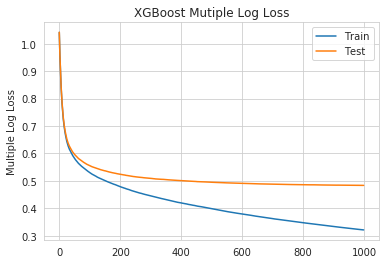

In [82]:
# plot mlogloss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('Multiple Log Loss')
plt.title('XGBoost Mutiple Log Loss')
plt.show()

Text(0.5, 1.0, 'XGBoost Multiple Classification Error')

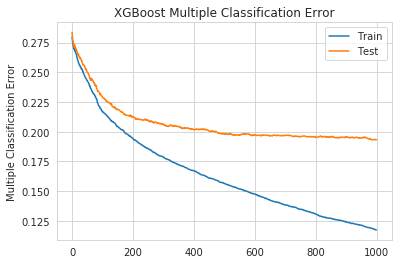

In [83]:
# plot classification merror
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('Multiple Classification Error')
plt.title('XGBoost Multiple Classification Error')

**Tuning Step 1**

In [66]:
#Tuneing n_estimators
param_grid = [{
    "n_estimators" : [550, 600, 650]
}]

clf = GridSearchCV(XGB, param_grid=param_grid, scoring = "accuracy", cv = 5)
clf.fit(dtrain[predictors], dtrain['status_group'])
clf.best_params_

{'n_estimators': 650}

**Tuning Step 2**

In [67]:
#Tuneing max_depth, min_child_weight
#Using n_estimators found above
param_grid = [{
    "max_depth" : range(3, 10, 2),
    "min_child_weight" : range(1, 6, 2)
}]

#Filtering Warnings
XGB = XGBClassifier(learning_rate=0.1,
                    n_estimators=650,
                    gamma = 0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27,
                    objective="multi:softmax",
                    num_class = 3)

clf = GridSearchCV(XGB, param_grid=param_grid, scoring = "balanced_accuracy", cv = 5)
clf.fit(dtrain[predictors], dtrain['status_group'])
clf.best_params_

{'max_depth': 9, 'min_child_weight': 1}

**Tuned Model**

In [820]:
XGB = XGBClassifier(learning_rate=0.1,
                    n_estimators=650,
                    max_depth = 9,
                    min_child_weight= 1,
                    gamma = 0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27,
                    objective="multi:softmax",
                    num_class = 3)


Model Report
	Accuracy : 0.928319
	Confusion Matrix : 
[[31514   158   582]
 [ 1083  3008   225]
 [ 2109   100 20609]]
	CV Merror rate Training: Mean = 0.1145 | Std = 0.0006744 
 		 Min = 0.0588
	CV Merror rate Testing: Mean = 0.1956 | Std = 0.001283 
 		 Min = 0.1879


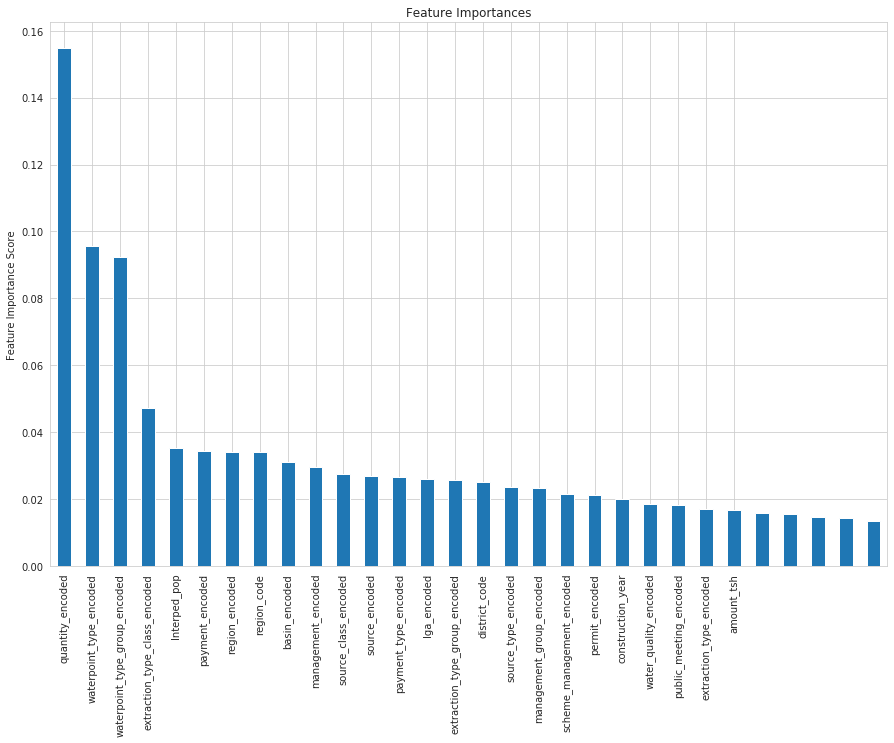

In [821]:
#Refitting the model using the optimized parameters
modelfit_xgb(XGB, dtrain, predictors, 'status_group', objective = 'class', eval_metric=metrics.balanced_accuracy_score)
plt.savefig("Images/XGB_Full_VarImp.png")

**Evaluating Tuned Model using Evaluation Test Split**

In [824]:
eval_set = [(X_train_split, y_train_split), (X_test_split, y_test_split)]
XGB.fit(X_train_split, y_train_split.values.ravel(), eval_metric=["merror", "mlogloss"], eval_set=eval_set)

/home/anna/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-merror:0.235803	validation_0-mlogloss:1.02955	validation_1-merror:0.241118	validation_1-mlogloss:1.0304
[1]	validation_0-merror:0.230457	validation_0-mlogloss:0.971147	validation_1-merror:0.235141	validation_1-mlogloss:0.972432
[2]	validation_0-merror:0.22831	validation_0-mlogloss:0.920089	validation_1-merror:0.23573	validation_1-mlogloss:0.922356
[3]	validation_0-merror:0.226037	validation_0-mlogloss:0.875975	validation_1-merror:0.230763	validation_1-mlogloss:0.879152
[4]	validation_0-merror:0.223048	validation_0-mlogloss:0.839085	validation_1-merror:0.229332	validation_1-mlogloss:0.84338
[5]	validation_0-merror:0.223911	validation_0-mlogloss:0.804865	validation_1-merror:0.229079	validation_1-mlogloss:0.810152
[6]	validation_0-merror:0.224163	validation_0-mlogloss:0.775034	validation_1-merror:0.230426	validation_1-mlogloss:0.781322
[7]	validation_0-merror:0.222501	validation_0-mlogloss:0.747891	validation_1-merror:0.227564	validation_1-mlogloss:0.754867
[8]	validation

[66]	validation_0-merror:0.159966	validation_0-mlogloss:0.414195	validation_1-merror:0.192288	validation_1-mlogloss:0.489321
[67]	validation_0-merror:0.159188	validation_0-mlogloss:0.412551	validation_1-merror:0.192036	validation_1-mlogloss:0.488764
[68]	validation_0-merror:0.158619	validation_0-mlogloss:0.411021	validation_1-merror:0.191867	validation_1-mlogloss:0.488228
[69]	validation_0-merror:0.158156	validation_0-mlogloss:0.409453	validation_1-merror:0.191194	validation_1-mlogloss:0.487515
[70]	validation_0-merror:0.157462	validation_0-mlogloss:0.40845	validation_1-merror:0.191362	validation_1-mlogloss:0.487291
[71]	validation_0-merror:0.156999	validation_0-mlogloss:0.407007	validation_1-merror:0.191699	validation_1-mlogloss:0.486834
[72]	validation_0-merror:0.156662	validation_0-mlogloss:0.405843	validation_1-merror:0.191446	validation_1-mlogloss:0.486461
[73]	validation_0-merror:0.156262	validation_0-mlogloss:0.404758	validation_1-merror:0.191699	validation_1-mlogloss:0.486229
[

[132]	validation_0-merror:0.126352	validation_0-mlogloss:0.343776	validation_1-merror:0.18488	validation_1-mlogloss:0.470794
[133]	validation_0-merror:0.125952	validation_0-mlogloss:0.343223	validation_1-merror:0.184964	validation_1-mlogloss:0.470595
[134]	validation_0-merror:0.125742	validation_0-mlogloss:0.342731	validation_1-merror:0.184964	validation_1-mlogloss:0.470687
[135]	validation_0-merror:0.125174	validation_0-mlogloss:0.341622	validation_1-merror:0.184543	validation_1-mlogloss:0.470393
[136]	validation_0-merror:0.124542	validation_0-mlogloss:0.340872	validation_1-merror:0.18488	validation_1-mlogloss:0.470391
[137]	validation_0-merror:0.12429	validation_0-mlogloss:0.340082	validation_1-merror:0.184711	validation_1-mlogloss:0.470315
[138]	validation_0-merror:0.123784	validation_0-mlogloss:0.338925	validation_1-merror:0.184964	validation_1-mlogloss:0.470028
[139]	validation_0-merror:0.1233	validation_0-mlogloss:0.338258	validation_1-merror:0.184964	validation_1-mlogloss:0.4699

[198]	validation_0-merror:0.101158	validation_0-mlogloss:0.296611	validation_1-merror:0.183617	validation_1-mlogloss:0.465178
[199]	validation_0-merror:0.100926	validation_0-mlogloss:0.296136	validation_1-merror:0.183701	validation_1-mlogloss:0.465143
[200]	validation_0-merror:0.100337	validation_0-mlogloss:0.29524	validation_1-merror:0.18328	validation_1-mlogloss:0.464937
[201]	validation_0-merror:0.100126	validation_0-mlogloss:0.294672	validation_1-merror:0.183196	validation_1-mlogloss:0.464905
[202]	validation_0-merror:0.099558	validation_0-mlogloss:0.293954	validation_1-merror:0.183533	validation_1-mlogloss:0.464909
[203]	validation_0-merror:0.099579	validation_0-mlogloss:0.293502	validation_1-merror:0.182943	validation_1-mlogloss:0.464858
[204]	validation_0-merror:0.099348	validation_0-mlogloss:0.292946	validation_1-merror:0.18328	validation_1-mlogloss:0.46478
[205]	validation_0-merror:0.0992	validation_0-mlogloss:0.29226	validation_1-merror:0.183196	validation_1-mlogloss:0.464705

[264]	validation_0-merror:0.081204	validation_0-mlogloss:0.259179	validation_1-merror:0.182522	validation_1-mlogloss:0.463847
[265]	validation_0-merror:0.080951	validation_0-mlogloss:0.258726	validation_1-merror:0.182607	validation_1-mlogloss:0.463868
[266]	validation_0-merror:0.080741	validation_0-mlogloss:0.258276	validation_1-merror:0.182607	validation_1-mlogloss:0.463904
[267]	validation_0-merror:0.080299	validation_0-mlogloss:0.257767	validation_1-merror:0.182775	validation_1-mlogloss:0.463912
[268]	validation_0-merror:0.079878	validation_0-mlogloss:0.256962	validation_1-merror:0.182607	validation_1-mlogloss:0.463911
[269]	validation_0-merror:0.079646	validation_0-mlogloss:0.256484	validation_1-merror:0.182522	validation_1-mlogloss:0.463911
[270]	validation_0-merror:0.079499	validation_0-mlogloss:0.256129	validation_1-merror:0.182017	validation_1-mlogloss:0.463809
[271]	validation_0-merror:0.079246	validation_0-mlogloss:0.255416	validation_1-merror:0.182354	validation_1-mlogloss:0

[330]	validation_0-merror:0.066491	validation_0-mlogloss:0.230427	validation_1-merror:0.184122	validation_1-mlogloss:0.465389
[331]	validation_0-merror:0.066554	validation_0-mlogloss:0.230155	validation_1-merror:0.183869	validation_1-mlogloss:0.465483
[332]	validation_0-merror:0.066133	validation_0-mlogloss:0.229742	validation_1-merror:0.184374	validation_1-mlogloss:0.465526
[333]	validation_0-merror:0.066091	validation_0-mlogloss:0.22928	validation_1-merror:0.18429	validation_1-mlogloss:0.465559
[334]	validation_0-merror:0.06567	validation_0-mlogloss:0.228812	validation_1-merror:0.183701	validation_1-mlogloss:0.465643
[335]	validation_0-merror:0.065649	validation_0-mlogloss:0.228553	validation_1-merror:0.183701	validation_1-mlogloss:0.465745
[336]	validation_0-merror:0.065418	validation_0-mlogloss:0.228128	validation_1-merror:0.184038	validation_1-mlogloss:0.465945
[337]	validation_0-merror:0.065334	validation_0-mlogloss:0.227692	validation_1-merror:0.184206	validation_1-mlogloss:0.46

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=371, n_jobs=1,
              nthread=4, num_class=3, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, silent=None, subsample=0.8, verbosity=1)

In [825]:
# retrieve performance metrics
results = XGB.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)

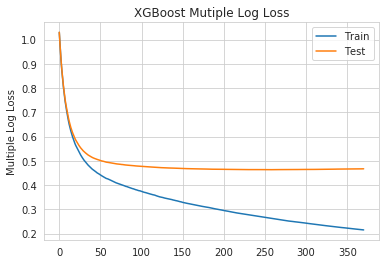

In [826]:
# plot mlogloss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('Multiple Log Loss')
plt.title('XGBoost Mutiple Log Loss')
plt.savefig("Images/XGB_Full_LogLoss.png")

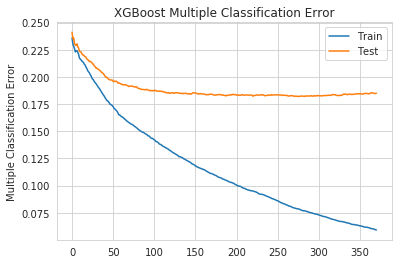

In [827]:
# plot classification merror
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('Multiple Classification Error')
plt.title('XGBoost Multiple Classification Error')
plt.savefig("Images/XGB_Full_Merror.png")

##### Using Limited Feature Set

In [783]:
XGB_lf = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma = 0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27,
                    objective="multi:softmax",
                    num_class = 3)

**Naive Model**


Model Report
	Accuracy : 0.870007
	Confusion Matrix : 
[[30682   243  1329]
 [ 1778  2081   457]
 [ 3770   143 18905]]
	CV Merror rate Training: Mean = 0.1677 | Std = 0.0009221 
 		 Min = 0.1201
	CV Merror rate Testing: Mean = 0.2096 | Std = 0.001883 
 		 Min = 0.1961


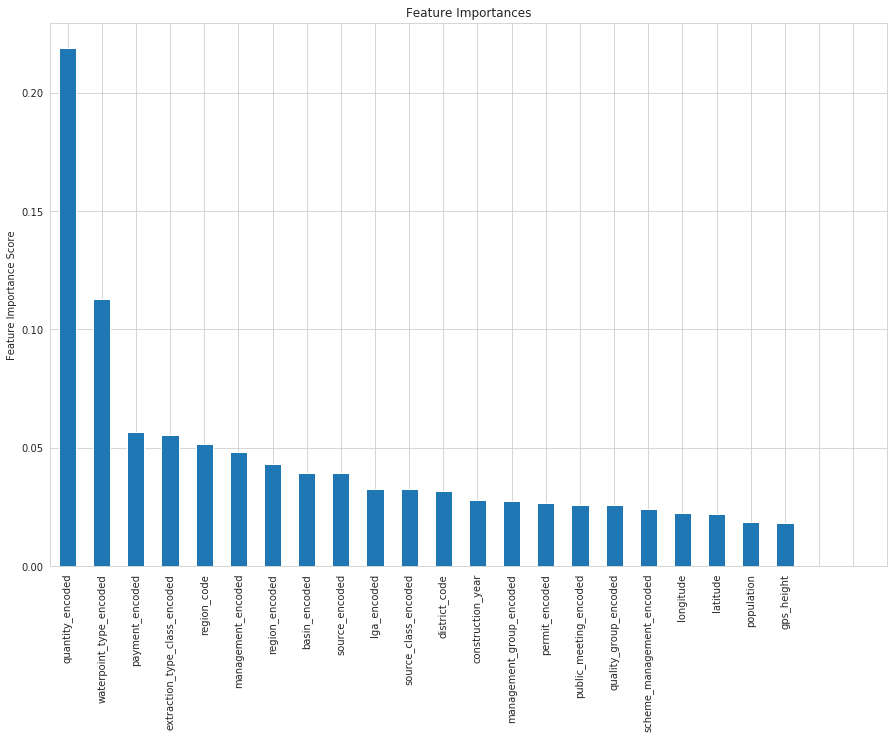

In [788]:
#Fitting the naive model
modelfit_xgb(XGB_lf, dtrain, predictors_limit, 'status_group', objective = 'class', eval_metric=metrics.balanced_accuracy_score, early_stopping_rounds=None)

**Evaluating Naive Model using Evaluation Test Split**

In [789]:
eval_set = [(X_train_split[predictors_limit], y_train_split), (X_test_split[predictors_limit], y_test_split)]
XGB_lf.fit(X_train_split[predictors_limit], y_train_split.values.ravel(), eval_metric=["merror", "mlogloss"], eval_set=eval_set)

/home/anna/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-merror:0.280509	validation_0-mlogloss:1.04158	validation_1-merror:0.278751	validation_1-mlogloss:1.04103
[1]	validation_0-merror:0.278173	validation_0-mlogloss:0.997923	validation_1-merror:0.27513	validation_1-mlogloss:0.99709
[2]	validation_0-merror:0.275058	validation_0-mlogloss:0.957637	validation_1-merror:0.273278	validation_1-mlogloss:0.956171
[3]	validation_0-merror:0.279204	validation_0-mlogloss:0.920679	validation_1-merror:0.27774	validation_1-mlogloss:0.918702
[4]	validation_0-merror:0.274258	validation_0-mlogloss:0.892343	validation_1-merror:0.272352	validation_1-mlogloss:0.889898
[5]	validation_0-merror:0.273942	validation_0-mlogloss:0.867644	validation_1-merror:0.271679	validation_1-mlogloss:0.8652
[6]	validation_0-merror:0.274447	validation_0-mlogloss:0.842123	validation_1-merror:0.272521	validation_1-mlogloss:0.838874
[7]	validation_0-merror:0.273248	validation_0-mlogloss:0.821059	validation_1-merror:0.271679	validation_1-mlogloss:0.817455
[8]	validation_

[66]	validation_0-merror:0.236182	validation_0-mlogloss:0.567363	validation_1-merror:0.233794	validation_1-mlogloss:0.566202
[67]	validation_0-merror:0.235698	validation_0-mlogloss:0.566252	validation_1-merror:0.233878	validation_1-mlogloss:0.565287
[68]	validation_0-merror:0.235129	validation_0-mlogloss:0.565339	validation_1-merror:0.233288	validation_1-mlogloss:0.564547
[69]	validation_0-merror:0.234814	validation_0-mlogloss:0.564275	validation_1-merror:0.233457	validation_1-mlogloss:0.563653
[70]	validation_0-merror:0.234582	validation_0-mlogloss:0.563271	validation_1-merror:0.233036	validation_1-mlogloss:0.562915
[71]	validation_0-merror:0.234309	validation_0-mlogloss:0.562699	validation_1-merror:0.23312	validation_1-mlogloss:0.562476
[72]	validation_0-merror:0.233614	validation_0-mlogloss:0.561727	validation_1-merror:0.233204	validation_1-mlogloss:0.561813
[73]	validation_0-merror:0.233319	validation_0-mlogloss:0.560464	validation_1-merror:0.232278	validation_1-mlogloss:0.560722
[

[132]	validation_0-merror:0.212587	validation_0-mlogloss:0.518456	validation_1-merror:0.214177	validation_1-mlogloss:0.530385
[133]	validation_0-merror:0.212313	validation_0-mlogloss:0.518072	validation_1-merror:0.214177	validation_1-mlogloss:0.53013
[134]	validation_0-merror:0.212292	validation_0-mlogloss:0.51777	validation_1-merror:0.213757	validation_1-mlogloss:0.530014
[135]	validation_0-merror:0.212019	validation_0-mlogloss:0.517193	validation_1-merror:0.213504	validation_1-mlogloss:0.52966
[136]	validation_0-merror:0.211976	validation_0-mlogloss:0.516857	validation_1-merror:0.213757	validation_1-mlogloss:0.529501
[137]	validation_0-merror:0.211598	validation_0-mlogloss:0.516407	validation_1-merror:0.213251	validation_1-mlogloss:0.529195
[138]	validation_0-merror:0.21145	validation_0-mlogloss:0.516065	validation_1-merror:0.213251	validation_1-mlogloss:0.529062
[139]	validation_0-merror:0.211134	validation_0-mlogloss:0.515459	validation_1-merror:0.212662	validation_1-mlogloss:0.528

[198]	validation_0-merror:0.2	validation_0-mlogloss:0.489647	validation_1-merror:0.207863	validation_1-mlogloss:0.515229
[199]	validation_0-merror:0.199895	validation_0-mlogloss:0.489404	validation_1-merror:0.207947	validation_1-mlogloss:0.515182
[200]	validation_0-merror:0.199705	validation_0-mlogloss:0.488894	validation_1-merror:0.207527	validation_1-mlogloss:0.514948
[201]	validation_0-merror:0.199348	validation_0-mlogloss:0.48847	validation_1-merror:0.207358	validation_1-mlogloss:0.514777
[202]	validation_0-merror:0.199263	validation_0-mlogloss:0.488064	validation_1-merror:0.20719	validation_1-mlogloss:0.514561
[203]	validation_0-merror:0.198948	validation_0-mlogloss:0.487703	validation_1-merror:0.207358	validation_1-mlogloss:0.514345
[204]	validation_0-merror:0.199053	validation_0-mlogloss:0.487417	validation_1-merror:0.206937	validation_1-mlogloss:0.514197
[205]	validation_0-merror:0.198463	validation_0-mlogloss:0.48691	validation_1-merror:0.207021	validation_1-mlogloss:0.514007


[264]	validation_0-merror:0.188234	validation_0-mlogloss:0.466137	validation_1-merror:0.204327	validation_1-mlogloss:0.505455
[265]	validation_0-merror:0.18815	validation_0-mlogloss:0.465777	validation_1-merror:0.204327	validation_1-mlogloss:0.505235
[266]	validation_0-merror:0.188255	validation_0-mlogloss:0.465512	validation_1-merror:0.204327	validation_1-mlogloss:0.505153
[267]	validation_0-merror:0.188108	validation_0-mlogloss:0.465172	validation_1-merror:0.20458	validation_1-mlogloss:0.505082
[268]	validation_0-merror:0.188024	validation_0-mlogloss:0.464865	validation_1-merror:0.20458	validation_1-mlogloss:0.504943
[269]	validation_0-merror:0.18796	validation_0-mlogloss:0.464498	validation_1-merror:0.203991	validation_1-mlogloss:0.504802
[270]	validation_0-merror:0.187939	validation_0-mlogloss:0.464228	validation_1-merror:0.203822	validation_1-mlogloss:0.504657
[271]	validation_0-merror:0.187834	validation_0-mlogloss:0.463942	validation_1-merror:0.203906	validation_1-mlogloss:0.504

[330]	validation_0-merror:0.179331	validation_0-mlogloss:0.446241	validation_1-merror:0.201128	validation_1-mlogloss:0.498603
[331]	validation_0-merror:0.179289	validation_0-mlogloss:0.446062	validation_1-merror:0.201044	validation_1-mlogloss:0.498517
[332]	validation_0-merror:0.179183	validation_0-mlogloss:0.445875	validation_1-merror:0.201128	validation_1-mlogloss:0.498451
[333]	validation_0-merror:0.179078	validation_0-mlogloss:0.445457	validation_1-merror:0.201128	validation_1-mlogloss:0.498239
[334]	validation_0-merror:0.179036	validation_0-mlogloss:0.445222	validation_1-merror:0.20096	validation_1-mlogloss:0.498254
[335]	validation_0-merror:0.178762	validation_0-mlogloss:0.444889	validation_1-merror:0.201381	validation_1-mlogloss:0.498157
[336]	validation_0-merror:0.178804	validation_0-mlogloss:0.444706	validation_1-merror:0.201044	validation_1-mlogloss:0.498125
[337]	validation_0-merror:0.178783	validation_0-mlogloss:0.444478	validation_1-merror:0.201212	validation_1-mlogloss:0.

[396]	validation_0-merror:0.172069	validation_0-mlogloss:0.430601	validation_1-merror:0.19936	validation_1-mlogloss:0.494132
[397]	validation_0-merror:0.171922	validation_0-mlogloss:0.430261	validation_1-merror:0.199444	validation_1-mlogloss:0.494088
[398]	validation_0-merror:0.17169	validation_0-mlogloss:0.430052	validation_1-merror:0.199697	validation_1-mlogloss:0.494058
[399]	validation_0-merror:0.171606	validation_0-mlogloss:0.429867	validation_1-merror:0.199276	validation_1-mlogloss:0.494036
[400]	validation_0-merror:0.171395	validation_0-mlogloss:0.429581	validation_1-merror:0.199613	validation_1-mlogloss:0.493987
[401]	validation_0-merror:0.171332	validation_0-mlogloss:0.429255	validation_1-merror:0.199697	validation_1-mlogloss:0.493879
[402]	validation_0-merror:0.171143	validation_0-mlogloss:0.429102	validation_1-merror:0.199781	validation_1-mlogloss:0.49385
[403]	validation_0-merror:0.170975	validation_0-mlogloss:0.428843	validation_1-merror:0.199697	validation_1-mlogloss:0.49

[462]	validation_0-merror:0.165207	validation_0-mlogloss:0.416259	validation_1-merror:0.197676	validation_1-mlogloss:0.490792
[463]	validation_0-merror:0.165144	validation_0-mlogloss:0.415995	validation_1-merror:0.197761	validation_1-mlogloss:0.490702
[464]	validation_0-merror:0.165102	validation_0-mlogloss:0.41576	validation_1-merror:0.197845	validation_1-mlogloss:0.490585
[465]	validation_0-merror:0.164976	validation_0-mlogloss:0.415527	validation_1-merror:0.197592	validation_1-mlogloss:0.490514
[466]	validation_0-merror:0.164555	validation_0-mlogloss:0.41527	validation_1-merror:0.197845	validation_1-mlogloss:0.490398
[467]	validation_0-merror:0.164639	validation_0-mlogloss:0.415117	validation_1-merror:0.198013	validation_1-mlogloss:0.490397
[468]	validation_0-merror:0.16466	validation_0-mlogloss:0.414859	validation_1-merror:0.197508	validation_1-mlogloss:0.490303
[469]	validation_0-merror:0.164786	validation_0-mlogloss:0.41466	validation_1-merror:0.19734	validation_1-mlogloss:0.4902

[528]	validation_0-merror:0.158451	validation_0-mlogloss:0.402511	validation_1-merror:0.195993	validation_1-mlogloss:0.487753
[529]	validation_0-merror:0.158304	validation_0-mlogloss:0.402317	validation_1-merror:0.195993	validation_1-mlogloss:0.487741
[530]	validation_0-merror:0.15803	validation_0-mlogloss:0.402088	validation_1-merror:0.195908	validation_1-mlogloss:0.487749
[531]	validation_0-merror:0.157883	validation_0-mlogloss:0.401991	validation_1-merror:0.196077	validation_1-mlogloss:0.487728
[532]	validation_0-merror:0.157756	validation_0-mlogloss:0.401854	validation_1-merror:0.195908	validation_1-mlogloss:0.487734
[533]	validation_0-merror:0.157651	validation_0-mlogloss:0.401651	validation_1-merror:0.195993	validation_1-mlogloss:0.487749
[534]	validation_0-merror:0.157735	validation_0-mlogloss:0.401478	validation_1-merror:0.195993	validation_1-mlogloss:0.487715
[535]	validation_0-merror:0.157714	validation_0-mlogloss:0.401296	validation_1-merror:0.196161	validation_1-mlogloss:0.

[594]	validation_0-merror:0.15262	validation_0-mlogloss:0.390323	validation_1-merror:0.195235	validation_1-mlogloss:0.485379
[595]	validation_0-merror:0.152263	validation_0-mlogloss:0.390118	validation_1-merror:0.195319	validation_1-mlogloss:0.485361
[596]	validation_0-merror:0.152431	validation_0-mlogloss:0.38993	validation_1-merror:0.195319	validation_1-mlogloss:0.48534
[597]	validation_0-merror:0.152578	validation_0-mlogloss:0.389752	validation_1-merror:0.195487	validation_1-mlogloss:0.485307
[598]	validation_0-merror:0.152452	validation_0-mlogloss:0.389635	validation_1-merror:0.195319	validation_1-mlogloss:0.48529
[599]	validation_0-merror:0.152284	validation_0-mlogloss:0.389443	validation_1-merror:0.195487	validation_1-mlogloss:0.485307
[600]	validation_0-merror:0.152136	validation_0-mlogloss:0.389245	validation_1-merror:0.195403	validation_1-mlogloss:0.48536
[601]	validation_0-merror:0.152052	validation_0-mlogloss:0.389077	validation_1-merror:0.195403	validation_1-mlogloss:0.4853

[660]	validation_0-merror:0.146453	validation_0-mlogloss:0.378674	validation_1-merror:0.193972	validation_1-mlogloss:0.483825
[661]	validation_0-merror:0.146348	validation_0-mlogloss:0.378527	validation_1-merror:0.194056	validation_1-mlogloss:0.483797
[662]	validation_0-merror:0.146348	validation_0-mlogloss:0.37837	validation_1-merror:0.193804	validation_1-mlogloss:0.483796
[663]	validation_0-merror:0.146201	validation_0-mlogloss:0.378211	validation_1-merror:0.193888	validation_1-mlogloss:0.483794
[664]	validation_0-merror:0.146053	validation_0-mlogloss:0.378035	validation_1-merror:0.193804	validation_1-mlogloss:0.483763
[665]	validation_0-merror:0.14599	validation_0-mlogloss:0.377898	validation_1-merror:0.193719	validation_1-mlogloss:0.483759
[666]	validation_0-merror:0.145948	validation_0-mlogloss:0.377669	validation_1-merror:0.193804	validation_1-mlogloss:0.483729
[667]	validation_0-merror:0.146032	validation_0-mlogloss:0.377544	validation_1-merror:0.194056	validation_1-mlogloss:0.4

[726]	validation_0-merror:0.141444	validation_0-mlogloss:0.36843	validation_1-merror:0.192878	validation_1-mlogloss:0.482033
[727]	validation_0-merror:0.141402	validation_0-mlogloss:0.368299	validation_1-merror:0.193383	validation_1-mlogloss:0.482031
[728]	validation_0-merror:0.141254	validation_0-mlogloss:0.368157	validation_1-merror:0.193214	validation_1-mlogloss:0.482025
[729]	validation_0-merror:0.141128	validation_0-mlogloss:0.367999	validation_1-merror:0.19313	validation_1-mlogloss:0.482021
[730]	validation_0-merror:0.14096	validation_0-mlogloss:0.367881	validation_1-merror:0.193467	validation_1-mlogloss:0.482023
[731]	validation_0-merror:0.140855	validation_0-mlogloss:0.36775	validation_1-merror:0.193383	validation_1-mlogloss:0.482004
[732]	validation_0-merror:0.140876	validation_0-mlogloss:0.367601	validation_1-merror:0.19313	validation_1-mlogloss:0.481963
[733]	validation_0-merror:0.140728	validation_0-mlogloss:0.367404	validation_1-merror:0.193214	validation_1-mlogloss:0.4819

[792]	validation_0-merror:0.136308	validation_0-mlogloss:0.358815	validation_1-merror:0.191699	validation_1-mlogloss:0.480603
[793]	validation_0-merror:0.136224	validation_0-mlogloss:0.358696	validation_1-merror:0.191867	validation_1-mlogloss:0.480625
[794]	validation_0-merror:0.13614	validation_0-mlogloss:0.35854	validation_1-merror:0.191952	validation_1-mlogloss:0.480615
[795]	validation_0-merror:0.136077	validation_0-mlogloss:0.358397	validation_1-merror:0.191699	validation_1-mlogloss:0.480598
[796]	validation_0-merror:0.136035	validation_0-mlogloss:0.358288	validation_1-merror:0.191615	validation_1-mlogloss:0.48057
[797]	validation_0-merror:0.136077	validation_0-mlogloss:0.35815	validation_1-merror:0.191699	validation_1-mlogloss:0.480577
[798]	validation_0-merror:0.135866	validation_0-mlogloss:0.358	validation_1-merror:0.191867	validation_1-mlogloss:0.48057
[799]	validation_0-merror:0.135971	validation_0-mlogloss:0.357918	validation_1-merror:0.191699	validation_1-mlogloss:0.480609


[858]	validation_0-merror:0.130183	validation_0-mlogloss:0.349434	validation_1-merror:0.191952	validation_1-mlogloss:0.479747
[859]	validation_0-merror:0.13012	validation_0-mlogloss:0.349325	validation_1-merror:0.19212	validation_1-mlogloss:0.479722
[860]	validation_0-merror:0.130204	validation_0-mlogloss:0.349199	validation_1-merror:0.191952	validation_1-mlogloss:0.479732
[861]	validation_0-merror:0.13033	validation_0-mlogloss:0.349051	validation_1-merror:0.191699	validation_1-mlogloss:0.479736
[862]	validation_0-merror:0.130351	validation_0-mlogloss:0.348903	validation_1-merror:0.191615	validation_1-mlogloss:0.479717
[863]	validation_0-merror:0.13033	validation_0-mlogloss:0.348783	validation_1-merror:0.191194	validation_1-mlogloss:0.47975
[864]	validation_0-merror:0.130225	validation_0-mlogloss:0.348695	validation_1-merror:0.191278	validation_1-mlogloss:0.479772
[865]	validation_0-merror:0.130099	validation_0-mlogloss:0.348602	validation_1-merror:0.19111	validation_1-mlogloss:0.47977

[924]	validation_0-merror:0.125616	validation_0-mlogloss:0.340697	validation_1-merror:0.191025	validation_1-mlogloss:0.479441
[925]	validation_0-merror:0.1257	validation_0-mlogloss:0.3406	validation_1-merror:0.190941	validation_1-mlogloss:0.47946
[926]	validation_0-merror:0.125637	validation_0-mlogloss:0.340462	validation_1-merror:0.190773	validation_1-mlogloss:0.479442
[927]	validation_0-merror:0.125616	validation_0-mlogloss:0.340377	validation_1-merror:0.190857	validation_1-mlogloss:0.479425
[928]	validation_0-merror:0.125574	validation_0-mlogloss:0.340247	validation_1-merror:0.190941	validation_1-mlogloss:0.479414
[929]	validation_0-merror:0.125363	validation_0-mlogloss:0.340136	validation_1-merror:0.190689	validation_1-mlogloss:0.479431
[930]	validation_0-merror:0.125426	validation_0-mlogloss:0.340031	validation_1-merror:0.190857	validation_1-mlogloss:0.479463
[931]	validation_0-merror:0.125258	validation_0-mlogloss:0.339929	validation_1-merror:0.191025	validation_1-mlogloss:0.4794

[990]	validation_0-merror:0.121406	validation_0-mlogloss:0.332584	validation_1-merror:0.191867	validation_1-mlogloss:0.479339
[991]	validation_0-merror:0.121196	validation_0-mlogloss:0.332459	validation_1-merror:0.191783	validation_1-mlogloss:0.479393
[992]	validation_0-merror:0.121238	validation_0-mlogloss:0.332324	validation_1-merror:0.191699	validation_1-mlogloss:0.479382
[993]	validation_0-merror:0.121069	validation_0-mlogloss:0.3322	validation_1-merror:0.191278	validation_1-mlogloss:0.479407
[994]	validation_0-merror:0.120985	validation_0-mlogloss:0.332136	validation_1-merror:0.191362	validation_1-mlogloss:0.479413
[995]	validation_0-merror:0.120964	validation_0-mlogloss:0.332021	validation_1-merror:0.191278	validation_1-mlogloss:0.479381
[996]	validation_0-merror:0.120964	validation_0-mlogloss:0.331928	validation_1-merror:0.191194	validation_1-mlogloss:0.479383
[997]	validation_0-merror:0.120922	validation_0-mlogloss:0.33184	validation_1-merror:0.191362	validation_1-mlogloss:0.47

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=4, num_class=3, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, silent=None, subsample=0.8, verbosity=1)

In [790]:
# retrieve performance metrics
results = XGB_lf.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)

Text(0.5, 1.0, 'XGBoost Mutiple - Limited Training Set - Log Loss')

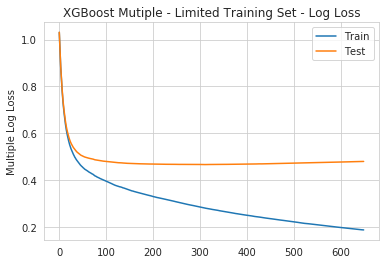

In [822]:
# plot mlogloss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('Multiple Log Loss')
plt.title('XGBoost Mutiple - Limited Training Set - Log Loss')

Text(0.5, 1.0, 'XGBoost - Limited Training Set - Multiple Classification Error')

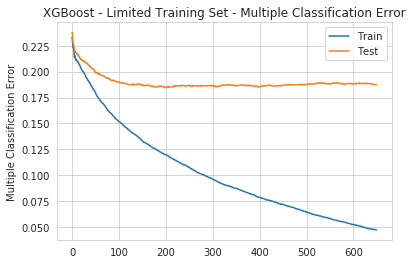

In [823]:
# plot classification merror
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('Multiple Classification Error')
plt.title('XGBoost - Limited Training Set - Multiple Classification Error')

**Tuning Step 1**

In [793]:
#Tuneing n_estimators
param_grid = [{
    "n_estimators" : [550, 600, 650]
}]

clf = GridSearchCV(XGB_lf, param_grid=param_grid, scoring = "accuracy", cv = 5)
clf.fit(dtrain[predictors_limit], dtrain['status_group'])
clf.best_params_

{'n_estimators': 650}

**Tuning Step 2**

In [794]:
#Tuneing max_depth, min_child_weight
#Using n_estimators found above
param_grid = [{
    "max_depth" : range(3, 10, 2),
    "min_child_weight" : range(1, 6, 2)
}]

#Filtering Warnings
XGB = XGBClassifier(learning_rate=0.1,
                    n_estimators=650,
                    gamma = 0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27,
                    objective="multi:softmax",
                    num_class = 3)

clf = GridSearchCV(XGB, param_grid=param_grid, scoring = "balanced_accuracy", cv = 5)
clf.fit(dtrain[predictors], dtrain['status_group'])
clf.best_params_

{'max_depth': 9, 'min_child_weight': 3}

**Tuned Model**

In [813]:
XGB_lf = XGBClassifier(learning_rate=0.1,
                    n_estimators=650,
                    max_depth=9,
                    min_child_weight=3,
                    gamma = 0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27,
                    objective="multi:softmax",
                    num_class = 3)


Model Report
	Accuracy : 0.940459
	Confusion Matrix : 
[[31603   153   498]
 [  845  3295   176]
 [ 1773    91 20954]]
	CV Merror rate Training: Mean = 0.1019 | Std = 0.001133 
 		 Min = 0.04756
	CV Merror rate Testing: Mean = 0.1945 | Std = 0.001545 
 		 Min = 0.1901


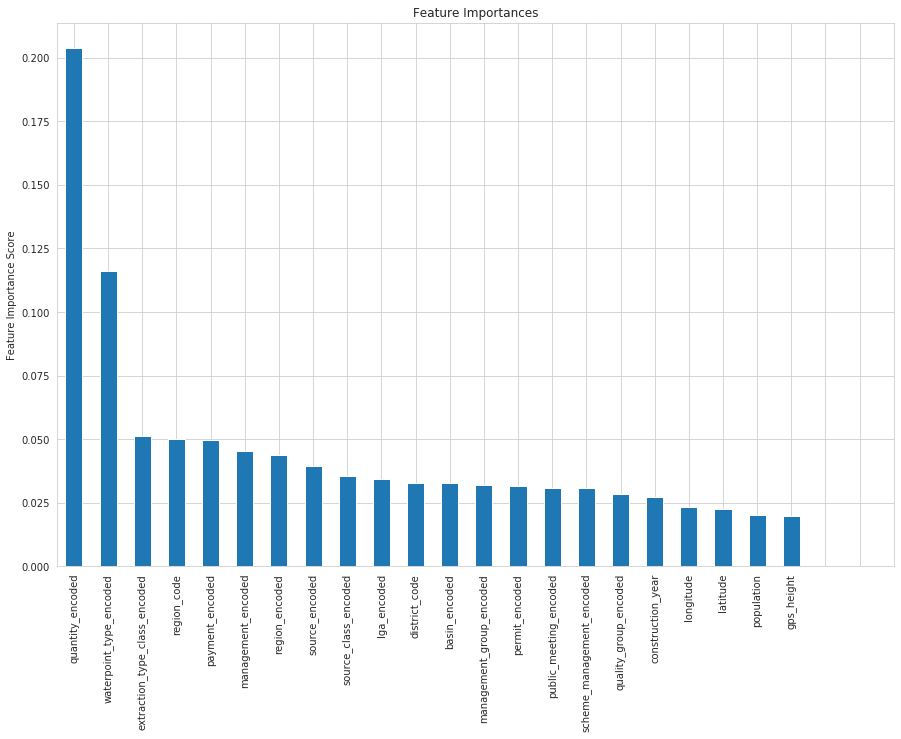

In [814]:
#refitting model using optimal parameters
modelfit_xgb(XGB_lf, dtrain, predictors_limit, 'status_group', objective = 'class', eval_metric=metrics.balanced_accuracy_score, early_stopping_rounds=None)
#plt.savefig("Images/XGB_Pars_varImp.png")

**Evaluating Tuned Model using Evaluation Test Split**

In [816]:
eval_set = [(X_train_split[predictors_limit], y_train_split), (X_test_split[predictors_limit], y_test_split)]
XGB_lf.fit(X_train_split[predictors_limit], y_train_split.values.ravel(), eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose = 0 )

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=3, missing=None, n_estimators=650, n_jobs=1,
              nthread=4, num_class=3, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, silent=None, subsample=0.8, verbosity=1)

In [817]:
# retrieve performance metrics
results = XGB_lf.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)

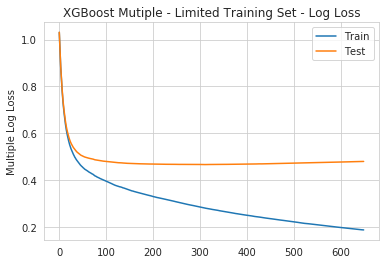

In [818]:
# plot mlogloss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('Multiple Log Loss')
plt.title('XGBoost Mutiple - Limited Training Set - Log Loss')
plt.savefig("Images/XGB_Pars_LogLoss.png")

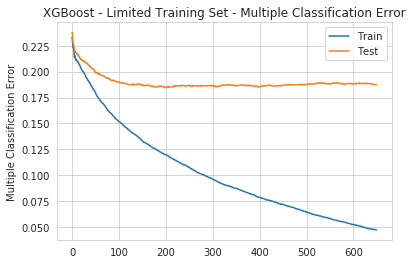

In [819]:
# plot classification merror
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('Multiple Classification Error')
plt.title('XGBoost - Limited Training Set - Multiple Classification Error')
plt.savefig("Images/XGB_Pars_Merror.png")

#### Predictions

In [804]:
le = LabelEncoder()

In [805]:
le.fit(y_train['status_group'])

LabelEncoder()

**Pred 1**

This first set of predictions is built using the XGB model with the following parameters:
+ learning_rate=0.1
+ n_estimators=1250
+ max_depth=5
+ min_child_weight=1
+ gamma = 0
+ subsample=0.8
+ colsample_bytree=0.8
+ nthread=4
+ scale_pos_weight=1
+ seed=27
+ objective="multi:softmax"
+ num_class = 3

In [ ]:
XGB.fit(X_train[predictors], y_train['status_group'])

In [ ]:
preds = XGB.predict(Final_test.iloc[:, 1:])
preds_df = pd.concat([Final_test['id'], pd.Series(preds, name = 'status_group')], axis = 1)
preds_df.to_csv("Data/Preds/Pred_XGB_1.csv", index = False)

**Pred 2**

This set of predictions is built using the XGB model with the following parameters:
+ learning_rate=0.1
+ n_estimators=1500
+ max_depth = 7
+ min_child_weight= 3
+ gamma = 0
+ subsample=0.8
+ colsample_bytree=0.8
+ nthread=4
+ scale_pos_weight=1
+ seed=27
+ objective="multi:softmax"
+ num_class = 3

In [ ]:
XGB.fit(dtrain[predictors], dtrain['status_group'])

In [ ]:
preds = XGB.predict(Final_test.iloc[:, 1:])
preds_df = pd.concat([Final_test['id'], pd.Series(preds, name = 'status_group')], axis = 1)
preds_df.to_csv("Data/Preds/Pred_XGB_2.csv", index = False)

**Pred 3**

This set of predictions is built using the XGB model with the following parameters:
+ learning_rate=0.1
+ n_estimators=650
+ max_depth = 9
+ min_child_weight= 1
+ gamma = 0
+ subsample=0.8
+ colsample_bytree=0.8
+ nthread=4
+ scale_pos_weight=1
+ seed=27
+ objective="multi:softmax"
+ num_class = 3

In [73]:
XGB.fit(dtrain[predictors], dtrain['status_group'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=287, n_jobs=1,
              nthread=4, num_class=3, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, silent=None, subsample=0.8, verbosity=1)

In [80]:
preds = XGB.predict(Final_test.iloc[:, 1:])
preds = le.inverse_transform(preds)
preds_df = pd.concat([Final_test['id'], pd.Series(preds, name = 'status_group')], axis = 1)
preds_df.to_csv("Data/Preds/Pred_XGB_3.csv", index = False)

**Preds 4**  
The predictions were generated using a model with the following parameters:
+ learning_rate=0.1
+ n_estimators=650
+ max_depth=9
+ min_child_weight=3
+ gamma = 0
+ subsample=0.8
+ colsample_bytree=0.8
+ nthread=4
+ scale_pos_weight=1
+ seed=27
+ objective="multi:softmax"
+ num_class = 3

In [801]:
XGB_lf.fit(dtrain[predictors_limit], dtrain['status_group'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=3, missing=None, n_estimators=650, n_jobs=1,
              nthread=4, num_class=3, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, silent=None, subsample=0.8, verbosity=1)

In [806]:
preds = XGB_lf.predict(Final_test[predictors_limit])
preds = le.inverse_transform(preds)
preds_df = pd.concat([Final_test['id'], pd.Series(preds, name = 'status_group')], axis = 1)
preds_df.to_csv("Data/Preds/Pred_XGB_Pars_1.csv", index = False)

## Modeling Conclusion

Of all models, the XGBoost model built on the full testing set preformed the best, with regard to results I was able to provide via training and cross validation. When these predictions were provided to the challange site, the XGBoost model preformed the best overall. 

Both the random forest models and the XGBoost models seemed to experience a notable amount of overfiiting when training on the full test set, and the accurcies provided through this method of model testing were inflated when compared to their final accuracy scores provided by the challange site. (In training these models often returned accuracies over 90%, while in both crossvalidation and on the challenge site, accuracy scores were notably closer to 80%)  

All three modeling groups selected quantity as being in the top 5 most important features for predicting the target. At least two of the modeling groups selected latitude, longitude, and waterppoint_type. I strongly believe that this data would be well supplemented by information on,
+ the climate of various regions
+ improved estimates of the height above sea level of the wells
+ rain fall
+ cleaned funder/installer information